## Telecom Churn ML

**Problem Statement:**

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.


**Objective of the Case study**:

- Predicting High Value Customers
- To Predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months
- To identify important features for chrurn
- To recommend strategies to manage customer churn

**Solution Abstract:**

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

We will be using various Machine Learning models to execute this task, For dimensonality reduction, we will be using PCA along with various models like Logistic Regression, Decision Trees and so on.

### Importing Libraries and Reading Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import time
import datetime
from sklearn.metrics import roc_curve
from IPython.display import Markdown, display ,HTML
import warnings
warnings.filterwarnings('ignore')

In [2]:
telecom1 = pd.read_csv('telecom_churn_data.csv')

In [3]:
#Reading the dataset
telecom = telecom1.copy()
telecom.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
5,7000286308,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,50.258,...,0,NaN,NaN,NaN,NaN,1471,0.00,0.00,0.00,0.00
6,7001051193,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,429.023,...,0,NaN,NaN,NaN,NaN,1673,0.00,0.00,0.00,0.00
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,119.518,...,0,NaN,1.0,NaN,NaN,902,0.00,0.00,0.00,0.00


### Data Preparation

In [4]:
telecom.shape

(99999, 226)

In churn prediction, we know that there are three phases of customer lifecycle :

- The ‘good’ phase [Month 6 & 7]
- The ‘action’ phase [Month 8]
- The ‘churn’ phase [Month 9]

In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

In [5]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [6]:
telecom.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

#### Filtering High Value Customers

In [7]:
#Find columns with recharge info
#since total recharge amount is to be used for High Value Customer Filter
tot_rech_cols = [col for col in telecom.columns if 'total_rech_' in col]
print(tot_rech_cols)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']


In [8]:
#Derive Total Data Recharge Amounts

telecom["total_rech_data_amt_6"] = telecom["total_rech_data_6"]  * telecom['av_rech_amt_data_6']
telecom["total_rech_data_amt_7"] = telecom["total_rech_data_7"]  * telecom['av_rech_amt_data_7']
telecom["total_rech_data_amt_8"] = telecom["total_rech_data_8"]  * telecom['av_rech_amt_data_8']
telecom["total_rech_data_amt_9"] = telecom["total_rech_data_9"]  * telecom['av_rech_amt_data_9']

In [9]:
#Average of Recharge Amount in 6th and 7th Month
av_rech_amt_6n7 = (telecom["total_rech_amt_6"].fillna(0) + telecom["total_rech_data_amt_6"].fillna(0) + 
telecom["total_rech_amt_7"].fillna(0) + telecom["total_rech_data_amt_7"].fillna(0))/2.0

#70th Percentile of Avg Recharge Amount
pc70_6n7 = np.percentile(av_rech_amt_6n7, 70.0)
print('70 percentile of 6th and 7th months avg recharge amount: ', pc70_6n7)

df_high_val_cust = telecom[av_rech_amt_6n7 >= pc70_6n7]
print('Dataframe Shape after Filtering High Value Customers: ', df_high_val_cust.shape)

70 percentile of 6th and 7th months avg recharge amount:  478.0
Dataframe Shape after Filtering High Value Customers:  (30001, 230)


#### Tag Churners

In [10]:
df_high_val_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74


In [11]:
#churned customers (churn=1, else 0) 
df_high_val_cust['churn'] = np.where(df_high_val_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 
                                   1,
                                   0)

In [12]:
df_high_val_cust['churn'].head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [13]:
df_high_val_cust['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [14]:
#Remove All 9th Month related columns
drop_cols = [col for col in df_high_val_cust.columns if '_9' in col]
print(drop_cols)

df_high_val_cust.drop(drop_cols, axis=1, inplace=True)

df_high_val_cust.shape

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_rech_data_amt_9']

(30001, 176)

#### Derving new features

In [15]:
# Let us first extract list of columns containing recharge amount
amt_recharge_columns =  df_high_val_cust.columns[df_high_val_cust.columns.str.contains('rech_amt|rech_data')]
print(amt_recharge_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'total_rech_data_amt_6', 'total_rech_data_amt_7',
       'total_rech_data_amt_8'],
      dtype='object')


#### Data Cleaning

In [16]:
df_high_val_cust.loc[:,amt_recharge_columns].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,16756.000000,17057.000000,15953.000000,16756.000000,17057.000000,15953.000000,16756.000000,17057.000000,15953.000000,16756.000000,17057.000000,15953.000000
mean,660.732342,660.498017,584.365454,169.284824,172.201727,160.144462,2.985975,3.260597,3.050147,139.798580,140.431143,136.329217,233.931758,245.857602,229.680303,816.052206,929.093052,871.187336
std,561.032865,582.430876,611.245907,175.315958,181.390742,173.207799,3.227379,3.496721,3.538953,118.851784,120.247247,119.531924,218.390120,221.691977,217.346118,1819.233267,1860.014914,2144.065234
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,360.000000,352.000000,250.000000,110.000000,110.000000,50.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,123.000000,138.000000,100.000000,154.000000,154.000000,154.000000
50%,566.000000,562.000000,490.000000,120.000000,128.000000,130.000000,2.000000,2.000000,2.000000,152.000000,152.000000,152.000000,184.000000,198.000000,179.000000,324.000000,399.000000,252.000000
75%,834.000000,831.000000,776.000000,200.000000,200.000000,198.000000,4.000000,4.000000,4.000000,198.000000,198.000000,198.000000,296.000000,304.000000,274.000000,855.250000,992.000000,861.000000
max,35190.000000,40335.000000,45320.000000,4010.000000,4010.000000,4449.000000,61.000000,54.000000,60.000000,1555.000000,1555.000000,1555.000000,7546.000000,4365.000000,4061.000000,105644.000000,55080.000000,89106.500000


As the minimum value is 1 we can impute the NA values by 0, Considering there were no recharges done by the customer.

In [17]:
df_high_val_cust['total_rech_data_6'] = df_high_val_cust['total_rech_data_6'].replace(np.NaN,0.0)
df_high_val_cust['total_rech_data_7'] = df_high_val_cust['total_rech_data_7'].replace(np.NaN,0.0)
df_high_val_cust['total_rech_data_8'] = df_high_val_cust['total_rech_data_8'].replace(np.NaN,0.0)

In [18]:
df_high_val_cust['av_rech_amt_data_6'] = df_high_val_cust['av_rech_amt_data_6'].replace(np.NaN,0.0)
df_high_val_cust['av_rech_amt_data_7'] = df_high_val_cust['av_rech_amt_data_7'].replace(np.NaN,0.0)
df_high_val_cust['av_rech_amt_data_8'] = df_high_val_cust['av_rech_amt_data_8'].replace(np.NaN,0.0)

### Exploratory Data Analysis

#### 1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

In [19]:
def get_variable_type(element) :
    """
     Check is columns are of Contineous or Categorical variable.
     Assumption is that if 
                 unique count < 20 then categorical 
                 unique count >= 20 and dtype = [int64 or float64] then contineous
     """
    if element==0:
        return "Not Known"
    elif element < 20 and element!=0 :
        return "Categorical"
    elif element >= 20 and element!=0 :
        return "Contineous" 
    
def get_meta_data(dataframe) :
    """
     Method to get Meta-Data about any dataframe passed 
    """
    metadata_matrix = pd.DataFrame({
                    'Datatype' : dataframe.dtypes.astype(str), 
                    'Non_Null_Count': dataframe.count(axis = 0).astype(int), 
                    'Null_Count': dataframe.isnull().sum().astype(int), 
                    'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100, 
                    'Unique_Values_Count': dataframe.nunique().astype(int) 
                     })
    
    metadata_matrix = predict_variable_type(metadata_matrix)
    return metadata_matrix
        
def display_columns_with_1_unique_value(dataframe):
    unique_values_count_1 = dataframe[dataframe["Unique_Values_Count"] == 1]
    drop_value_col = unique_values_count_1.index.tolist()
    lenght = len(drop_value_col)
    header("Columns with only one unique value : "+str(lenght))
    if lenght == 0 :
        header_red("No columns with only one unique values.")  
    else :    
        log("Columns with only one unique value :")
        for index,item in enumerate(drop_value_col) :
            print(index,".",item)
            
def predict_variable_type(metadata_matrix):
    metadata_matrix["Variable_Type"] = metadata_matrix["Unique_Values_Count"].apply(get_variable_type).astype(str)
    metadata_matrix["frequency"] = metadata_matrix["Null_Count"] - metadata_matrix["Null_Count"]
    metadata_matrix["frequency"].astype(int)
    return metadata_matrix 

In [20]:
get_meta_data(df_high_val_cust)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count,Variable_Type,frequency
mobile_number,int64,30001,0,0.000000,30001,Contineous,0
circle_id,int64,30001,0,0.000000,1,Categorical,0
loc_og_t2o_mou,float64,29777,224,0.746642,1,Categorical,0
std_og_t2o_mou,float64,29777,224,0.746642,1,Categorical,0
loc_ic_t2o_mou,float64,29777,224,0.746642,1,Categorical,0
...,...,...,...,...,...,...,...
sep_vbc_3g,float64,30001,0,0.000000,2635,Contineous,0
total_rech_data_amt_6,float64,16756,13245,44.148528,1641,Contineous,0
total_rech_data_amt_7,float64,17057,12944,43.145228,1745,Contineous,0
total_rech_data_amt_8,float64,15953,14048,46.825106,1620,Contineous,0


In [21]:
#Remove Data which has only 1 unique Value

#List of columns with only 1 unqiue value
col_list = df_high_val_cust.loc[:,df_high_val_cust.apply(pd.Series.nunique) == 1]
col_list.head(5)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,0.0,NaN,NaN,0.0
7,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
8,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
21,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
23,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#Remove Columns with only 1 unique value
df_high_val_cust = df_high_val_cust.loc[:,df_high_val_cust.apply(pd.Series.nunique) != 1]
df_high_val_cust.shape

(30001, 163)

In [23]:
#Rename Columns with Meaning full Names
# aug_vbc_3g jul_vbc_3g jun_vbc_3g sep_vbc_3g

df_high_val_cust.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [24]:
#Check for Columns that can be changed to integers, floats or other types
object_col_data = df_high_val_cust.select_dtypes(include=['object'])
print(object_col_data.iloc[0])

date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_data_6    6/21/2014
date_of_last_rech_data_7    7/16/2014
date_of_last_rech_data_8     8/8/2014
Name: 0, dtype: object


In [25]:
# convert to datetime
for col in object_col_data.columns:
    df_high_val_cust[col] = pd.to_datetime(df_high_val_cust[col])

df_high_val_cust.shape

(30001, 163)

In [26]:
get_meta_data(df_high_val_cust)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count,Variable_Type,frequency
mobile_number,int64,30001,0,0.000000,30001,Contineous,0
arpu_6,float64,30001,0,0.000000,29072,Contineous,0
arpu_7,float64,30001,0,0.000000,29084,Contineous,0
arpu_8,float64,30001,0,0.000000,28073,Contineous,0
onnet_mou_6,float64,29456,545,1.816606,16890,Contineous,0
...,...,...,...,...,...,...,...
vbc_3g_9,float64,30001,0,0.000000,2635,Contineous,0
total_rech_data_amt_6,float64,16756,13245,44.148528,1641,Contineous,0
total_rech_data_amt_7,float64,17057,12944,43.145228,1745,Contineous,0
total_rech_data_amt_8,float64,15953,14048,46.825106,1620,Contineous,0


#### 2. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

In [27]:
#Creating a copy of dataset before moving further

telecom_df_high_val_cust = df_high_val_cust.copy()

In [28]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = telecom_df_high_val_cust
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()

#### a. Recharge amount related variables

In [29]:
recharge_amnt_columns =  telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

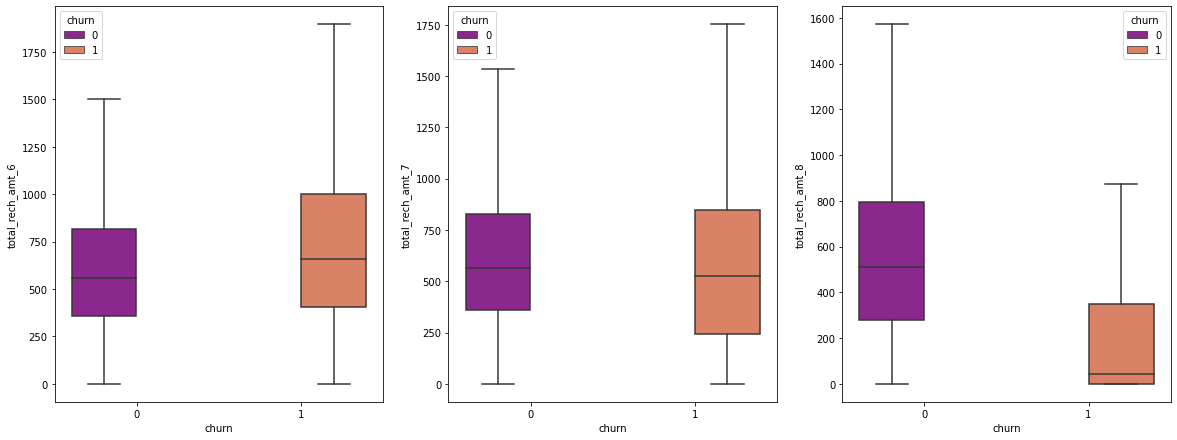

In [30]:
plot_box_chart('total_rech_amt')

We can see that there is a huge drop in total recharge amount for data in the 8th month (action phase) for churned customers.

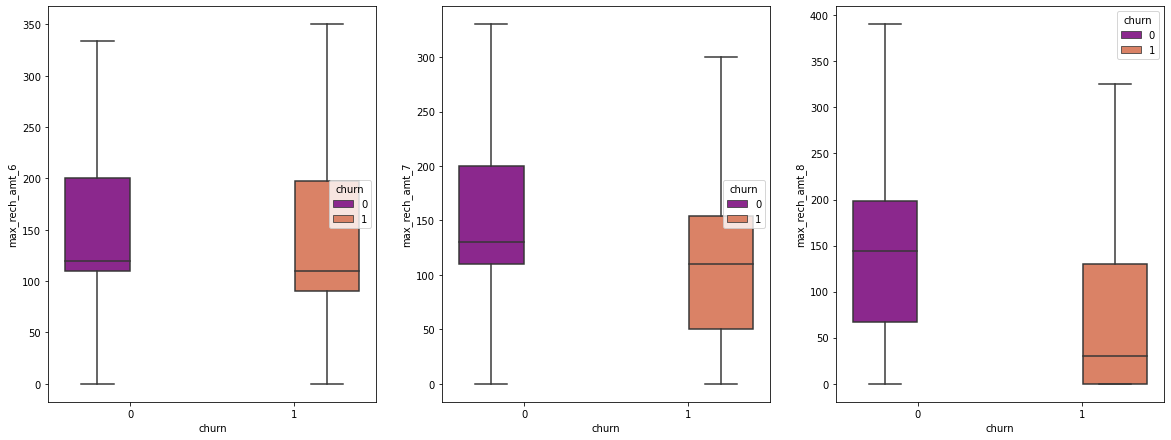

In [31]:
plot_box_chart('max_rech_amt')

We can see that there is a huge drop in maximum recharge amount for data in the 8th month (action phase) for churned customers.

In [32]:
# Let's check other recharge related variables:
other_recharge = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('rech_num|max_rech_data',regex=True)]

In [33]:
# lets check the % of NA values for other recharge related variables
100*telecom_df_high_val_cust.loc[:,other_recharge].isnull().sum()/len(telecom_df_high_val_cust)

total_rech_num_6     0.000000
total_rech_num_7     0.000000
total_rech_num_8     0.000000
max_rech_data_6     44.148528
max_rech_data_7     43.145228
max_rech_data_8     46.825106
dtype: float64

In [34]:
telecom_df_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,16756.000000,17057.000000,15953.000000
mean,139.798580,140.431143,136.329217
std,118.851784,120.247247,119.531924
min,1.000000,1.000000,1.000000
25%,25.000000,25.000000,25.000000
50%,152.000000,152.000000,152.000000
75%,198.000000,198.000000,198.000000
max,1555.000000,1555.000000,1555.000000


We see that the minimum value is 1 while the max is 1555 across months, which indicate the missing values are where no recharges happened for the data, Filling the missing values by 0 , means no recharge.

In [35]:
telecom_df_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] \
= telecom_df_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

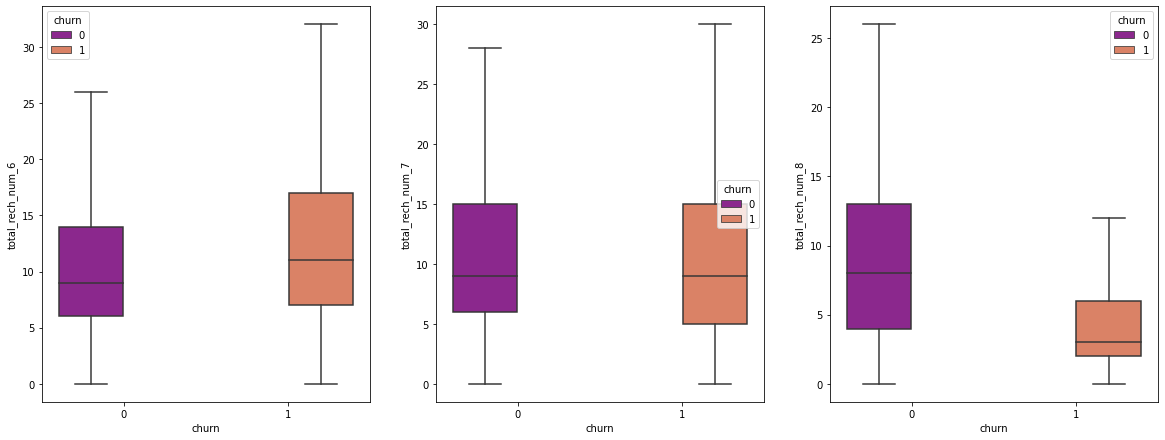

In [36]:
# Ploting for Total recharge for Number:
plot_box_chart('total_rech_num')

We can see that there is a huge drop in total recharge number also in the 8th month (action phase) for churned customers.

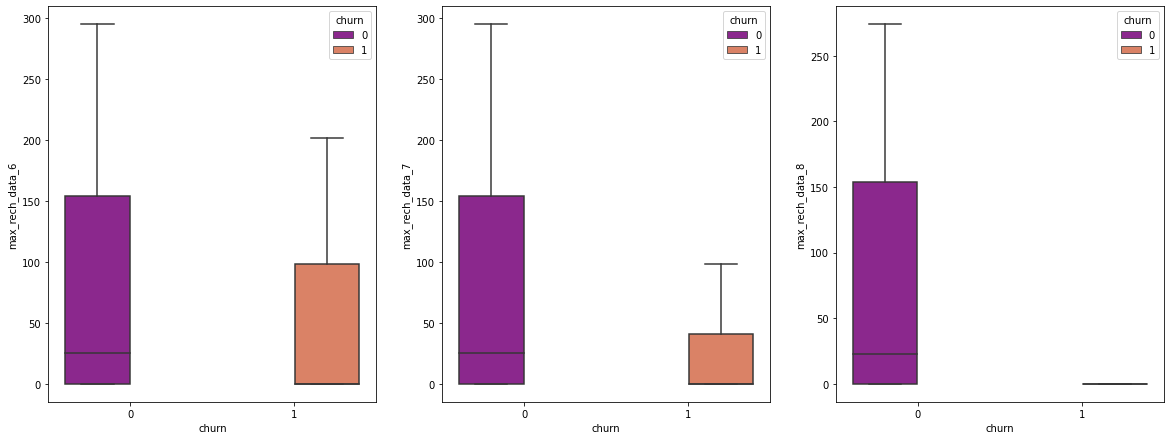

In [37]:
# Ploting for maximum recharge for data:
plot_box_chart('max_rech_data')

We can see that there is a huge drop in maximum recharge for data also in the 8th month (action phase) for churned customers.

In [38]:
#Getting the last day recharge amount columns
last_day_rech_amt = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('day')]

In [39]:
last_day_rech_amt.tolist()

['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']

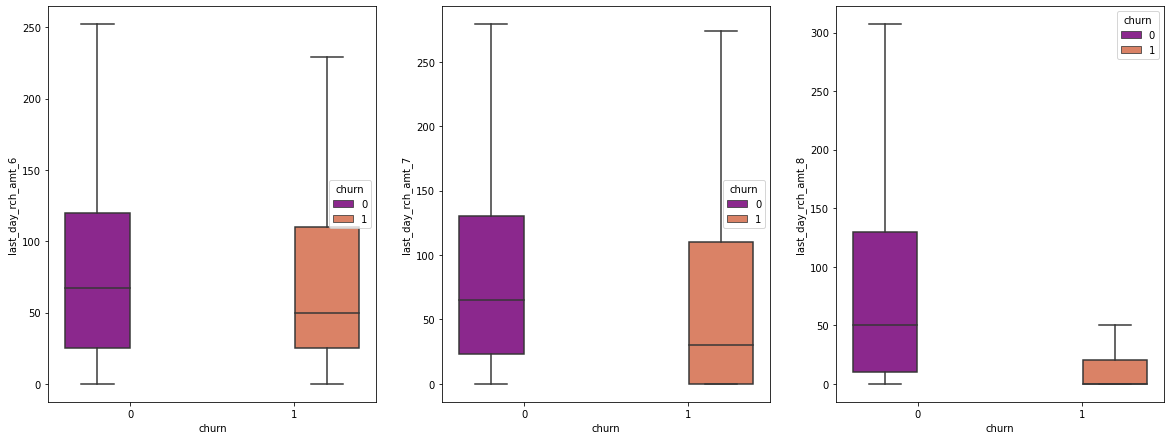

In [40]:
# Ploting for last day recharge amount:
plot_box_chart('last_day_rch_amt')

 We are getting a huge drop in 8th month recharge amount for churned customers

#### b.2G and 3G usage related attributes

In [41]:
usage_2g_and_3g = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('2g|3g',regex=True)]

In [42]:
get_meta_data(df_high_val_cust)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count,Variable_Type,frequency
mobile_number,int64,30001,0,0.000000,30001,Contineous,0
arpu_6,float64,30001,0,0.000000,29072,Contineous,0
arpu_7,float64,30001,0,0.000000,29084,Contineous,0
arpu_8,float64,30001,0,0.000000,28073,Contineous,0
onnet_mou_6,float64,29456,545,1.816606,16890,Contineous,0
...,...,...,...,...,...,...,...
vbc_3g_9,float64,30001,0,0.000000,2635,Contineous,0
total_rech_data_amt_6,float64,16756,13245,44.148528,1641,Contineous,0
total_rech_data_amt_7,float64,17057,12944,43.145228,1745,Contineous,0
total_rech_data_amt_8,float64,15953,14048,46.825106,1620,Contineous,0


In [43]:
#let us check the % of NA values present specific to 2g and 3g usage
percentage_3g_2g_null_check = 100*telecom_df_high_val_cust.loc[:,usage_2g_and_3g].isnull().sum()/len(telecom_df_high_val_cust.loc[:,usage_2g_and_3g])
df = pd.DataFrame(percentage_3g_2g_null_check)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
df = pd.DataFrame(df.Null_Percentage)
display(df)

,Null_Percentage
count_rech_2g_6,44.148528
count_rech_2g_7,43.145228
count_rech_2g_8,46.825106
count_rech_3g_6,44.148528
count_rech_3g_7,43.145228
count_rech_3g_8,46.825106
vol_2g_mb_6,0.000000
vol_2g_mb_7,0.000000
vol_2g_mb_8,0.000000
vol_3g_mb_6,0.000000


We are getting more then 40% values are not available for count of recharge and average revenue for 2G/3G per user. Although we have 2G/3G volume usage based data available, we can drop these columns.

In [44]:
telecom_df_high_val_cust.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

In [45]:
get_meta_data(telecom_df_high_val_cust)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count,Variable_Type,frequency
mobile_number,int64,30001,0,0.000000,30001,Contineous,0
arpu_6,float64,30001,0,0.000000,29072,Contineous,0
arpu_7,float64,30001,0,0.000000,29084,Contineous,0
arpu_8,float64,30001,0,0.000000,28073,Contineous,0
onnet_mou_6,float64,29456,545,1.816606,16890,Contineous,0
...,...,...,...,...,...,...,...
vbc_3g_9,float64,30001,0,0.000000,2635,Contineous,0
total_rech_data_amt_6,float64,16756,13245,44.148528,1641,Contineous,0
total_rech_data_amt_7,float64,17057,12944,43.145228,1745,Contineous,0
total_rech_data_amt_8,float64,15953,14048,46.825106,1620,Contineous,0


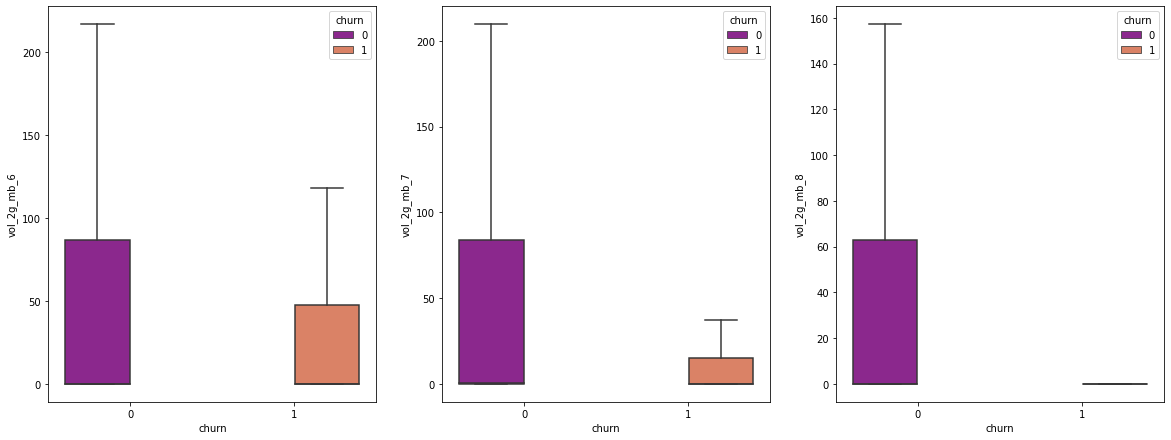

In [46]:
# Ploting for volume of 2G and 3G usage columns:
plot_box_chart('vol_2g_mb')

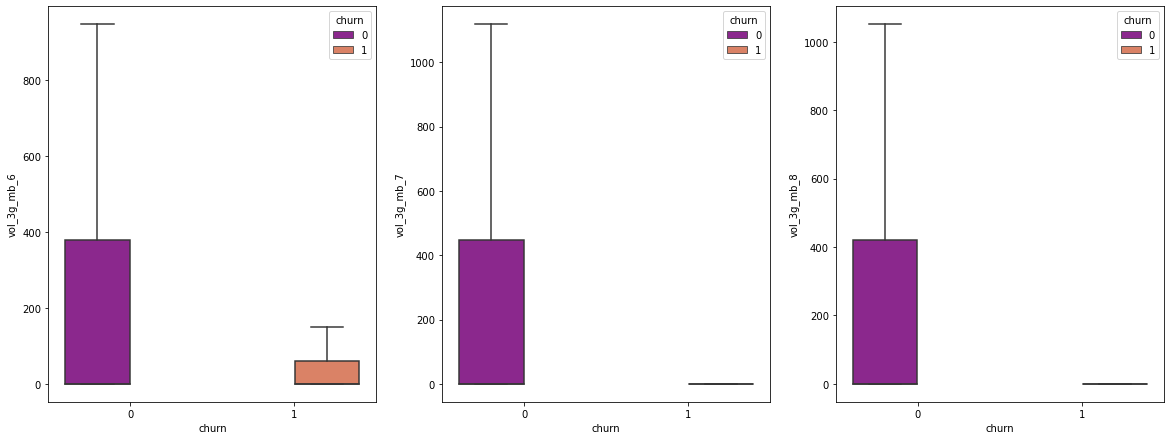

In [47]:
plot_box_chart('vol_3g_mb')

We have two observations from above:

1) 2G and 3G usage for churned customers drops in 8th month

2) We also see that 2G/3G usage is higher for non-churned customers indicating that churned customers might be from areas where 2G/3G service is not properly available.

In [48]:
# let's check monthly 2G/3G service schemes
monthly_subcription_2g_3g = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

In [49]:
def plot_mean_bar_chart(df,columns_list):
    df_0 = df[df.churn==0].filter(columns_list)
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

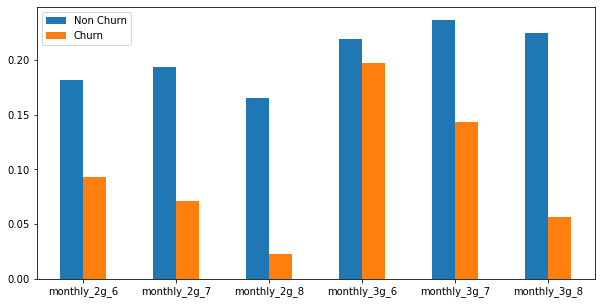

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.181676,0.193215,0.165203,0.219557,0.236575,0.224673
Churn,0.093404,0.070873,0.022941,0.197460,0.143794,0.056944


In [50]:
plot_mean_bar_chart(telecom_df_high_val_cust, monthly_subcription_2g_3g)

Again we can see a drop in monthly subscription for churned customers in 8th Month.

In [51]:
# let's check Volume based cost 
vbc_column = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('vbc_',regex=True)]
vbc_column.tolist()

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'vbc_3g_9']

In [52]:
# Renaming month named vbc columns to 6,7,8,9 format
telecom_df_high_val_cust.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# drop 9th month column as it is not needed
telecom_df_high_val_cust.drop('vbc_3g_9',axis=1,inplace=True)

In [53]:
vbc_column = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('vbc_3g',regex=True)]
vbc_column.tolist()


['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

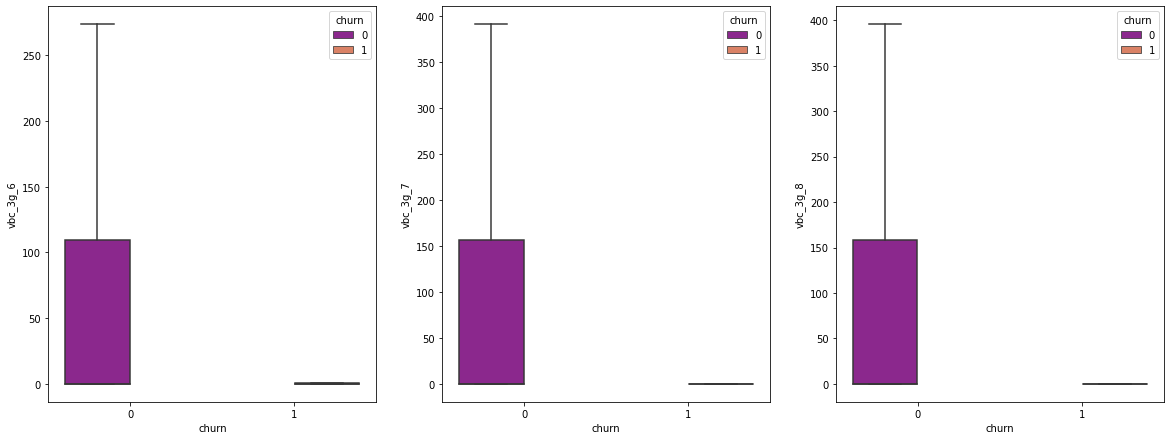

In [54]:
# Ploting for volume based cost :
plot_box_chart('vbc_3g')

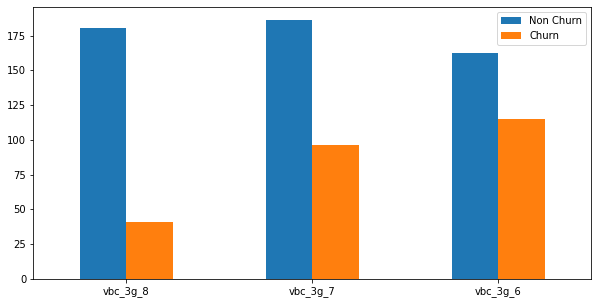

,vbc_3g_8,vbc_3g_7,vbc_3g_6
Non Churn,180.501280,186.206078,162.370343
Churn,40.851975,96.076317,115.096575


In [55]:
plot_mean_bar_chart(telecom_df_high_val_cust, vbc_column)

Significantly it showing that volume based cost for 3G is much lower for Churned customers as compared to Non-Churned Customers and also there is a drop in vbc in 8th month

In [56]:
# Checking Service schemes with validity smaller than a month for 2G/3G
SC_2g_or_3g_col = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('sachet_2g|sachet_3g',regex=True)]

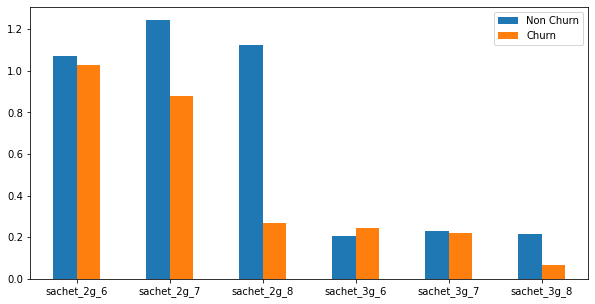

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non Churn,1.069303,1.243832,1.124383,0.206313,0.228048,0.214550
Churn,1.029496,0.877509,0.269971,0.244162,0.221221,0.065137


In [57]:
plot_mean_bar_chart(telecom_df_high_val_cust, SC_2g_or_3g_col)

We can see the drop in sachet services in 8th month for churned cutsomers

#### C. Average Revenue Per User

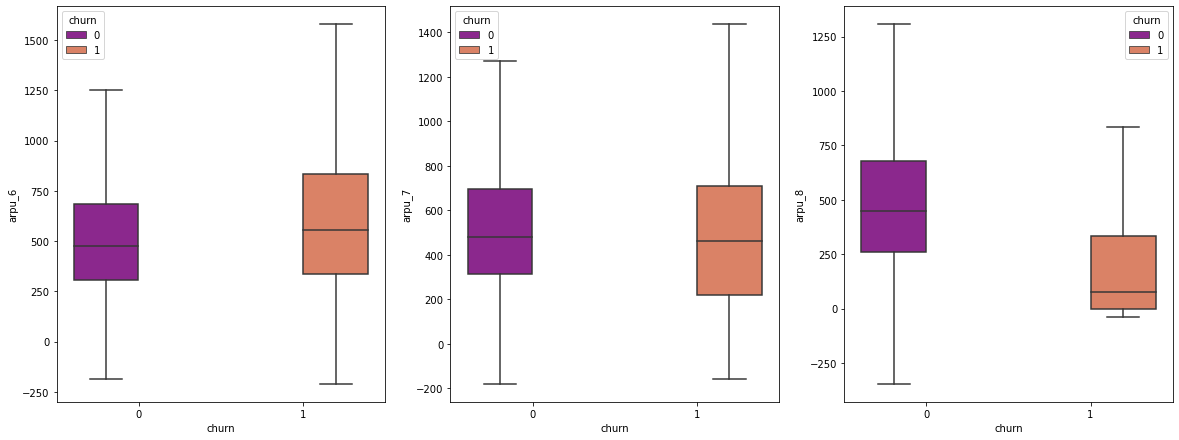

In [58]:
# Checking columns for average revenue per user
arpu_cols = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('arpu_')]

# Plotting arpu
plot_box_chart('arpu')

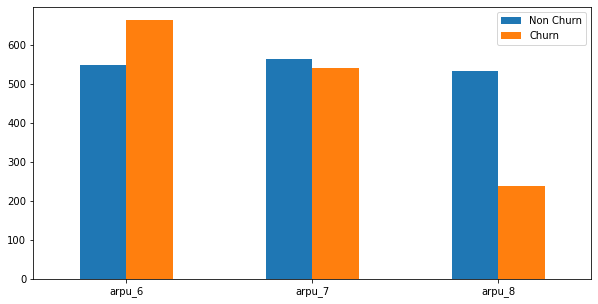

,arpu_6,arpu_7,arpu_8
Non Churn,549.220390,562.608191,532.635710
Churn,663.158246,540.165968,237.200793


In [59]:
plot_mean_bar_chart(telecom_df_high_val_cust, arpu_cols)

We can see that huge drops for Arpu in 8th month for churned customers

#### D. Minutes of usage - voice calls

In [60]:
mou_cols = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('mou')]

In [61]:
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [62]:
#Checking null percentage for them

meta_df = get_meta_data(telecom_df_high_val_cust[mou_cols])
meta_df.sort_values(["Null_Percentage"], axis=0,ascending=False, inplace=True)
col_to_display = ['Null_Percentage']
meta_df[col_to_display]

,Null_Percentage
isd_ic_mou_8,3.913203
loc_ic_t2t_mou_8,3.913203
loc_ic_t2m_mou_8,3.913203
std_og_t2t_mou_8,3.913203
loc_og_t2c_mou_8,3.913203
...,...
total_ic_mou_6,0.000000
total_ic_mou_7,0.000000
total_ic_mou_8,0.000000
total_og_mou_6,0.000000


For all minutes of usage columns the maximum missing % is 3.91 , means in these case the customer has not been used at all for that particular call type, thus we can fill the missing values with zero

In [63]:
# replaceing null values by 0 for minutes of usage variables
telecom_df_high_val_cust.loc[:,mou_cols] = telecom_df_high_val_cust.loc[:,mou_cols].replace(np.NaN,0)

In [64]:
mou_og_cols6 = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('.*_og_.*mou_6',regex=True)]

In [65]:
telecom_df_high_val_cust.loc[:,mou_og_cols6].describe()

,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,total_og_mou_6
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,26.571547,84.484753,163.243297,6.344115,1.575104,254.080388,165.885296,179.433389,1.803548,347.125955,2.171525,5.818270,609.866251
std,116.205525,228.794004,250.116700,22.123561,6.303385,378.339061,403.831965,409.025814,11.979429,608.629048,45.852190,17.567237,690.873430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.380000,19.210000,0.000000,0.000000,32.260000,0.000000,0.000000,0.000000,0.380000,0.000000,0.000000,116.580000
50%,0.000000,24.330000,77.180000,0.000000,0.000000,124.540000,2.710000,16.360000,0.000000,45.130000,0.000000,0.210000,410.630000
75%,0.000000,77.980000,208.930000,4.230000,0.000000,332.090000,109.610000,154.540000,0.000000,465.390000,0.000000,5.210000,858.760000
max,3775.110000,6431.330000,4729.740000,1466.030000,271.440000,10643.380000,7366.580000,8314.760000,628.560000,8432.990000,5900.660000,1023.210000,10674.030000


In [66]:
def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()

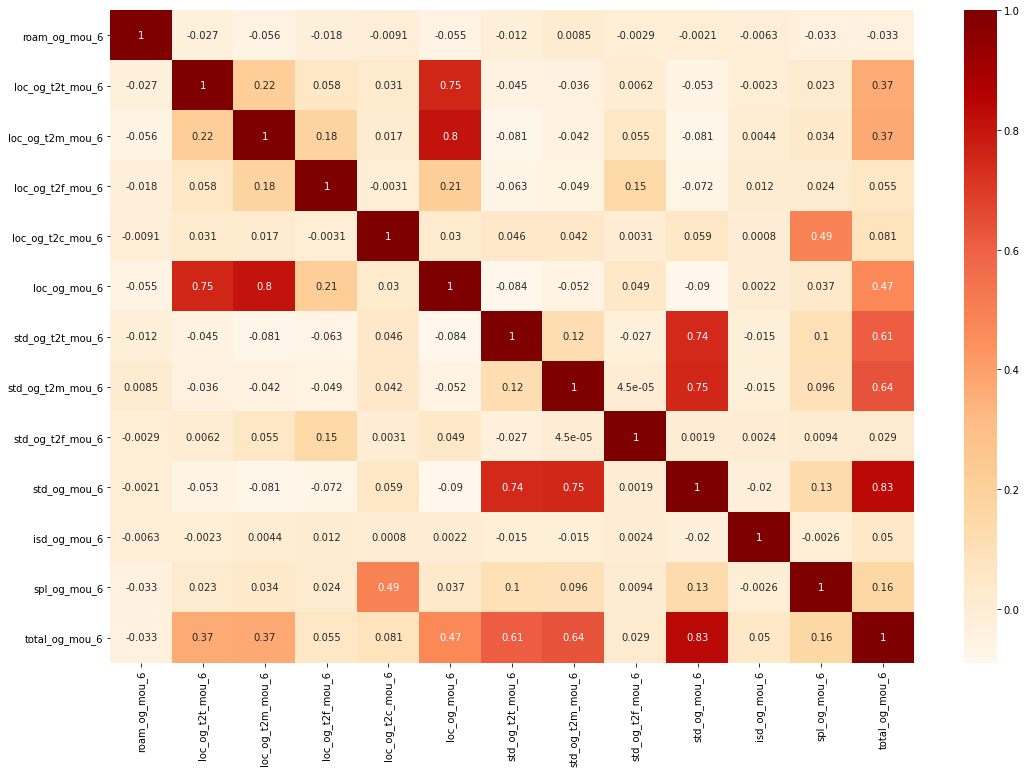

In [67]:
heatmap(18,12,telecom_df_high_val_cust.filter(mou_og_cols6))

We can see that total_og_mou_6, std_og_mou_6 and loc_og_mou_6 seems to have strong correlation with other fileds and they needs to be inspected to avoid any multicolinearity issues.

We can see that total_og_mou_6, std_og_mou_6 and loc_og_mou_6 is a combination of other variables present in dataset.So we can remove these columns for all months from the data set

In [68]:
list_total_og_cols = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
telecom_df_high_val_cust.drop(list_total_og_cols,axis=1,inplace=True)

In [69]:
telecom_df_high_val_cust.shape

(30001, 141)

In [70]:
#Checking incoming mou variables
mou_ic_cols6 = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('.*_ic_.*mou_6',regex=True)]

In [71]:
telecom_df_high_val_cust.loc[:,mou_ic_cols6].describe()

,roam_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,16.110355,65.453285,150.412393,15.278467,231.153776,14.894779,29.195215,2.695855,46.789434,289.950496,0.061035,10.784689
std,76.302156,163.738880,219.198969,45.751937,314.821196,77.695681,98.210477,19.099927,137.501469,365.523475,0.188058,76.729297
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.090000,28.080000,0.000000,47.880000,0.000000,0.000000,0.000000,1.030000,72.880000,0.000000,0.000000
50%,0.000000,25.080000,84.060000,1.840000,134.490000,0.380000,5.000000,0.000000,11.410000,183.730000,0.000000,0.000000
75%,0.000000,67.430000,188.710000,11.980000,297.140000,8.200000,23.600000,0.110000,41.490000,371.990000,0.000000,0.000000
max,2613.310000,6351.440000,4693.860000,1678.410000,7454.630000,5459.560000,4630.230000,1351.110000,5459.630000,7716.140000,19.760000,6789.410000


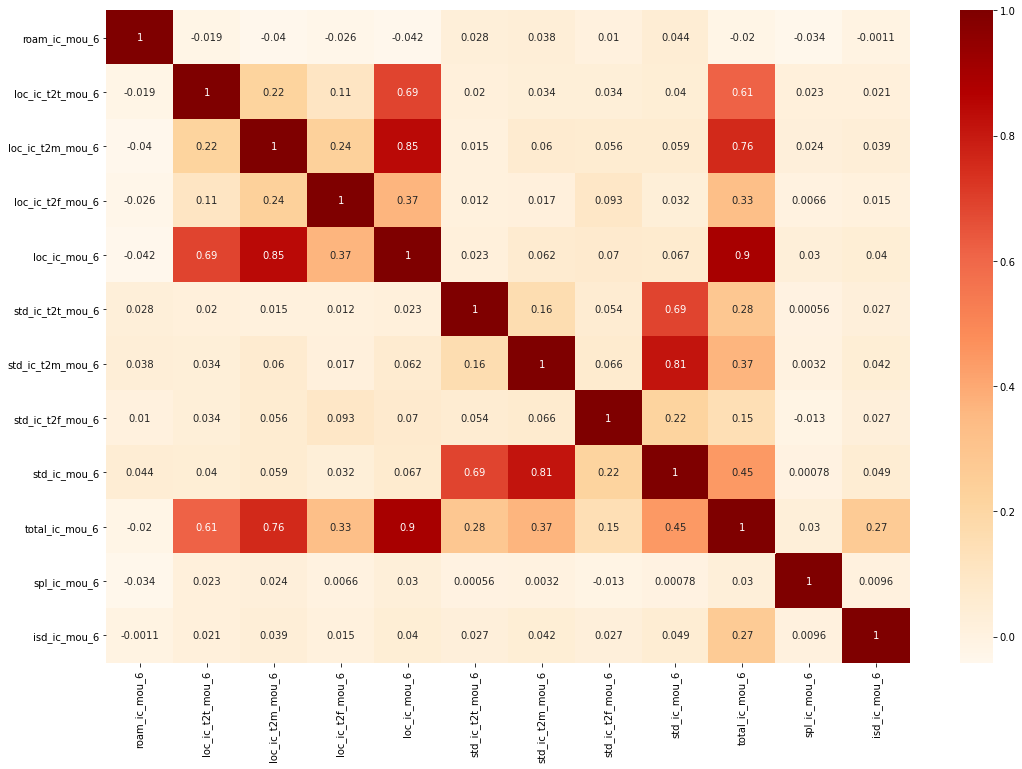

In [72]:
heatmap(18,12,telecom_df_high_val_cust.filter(mou_ic_cols6))

We can see that total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 is a combination of other variables present in dataset.So we can remove these columns for all months from the data set

In [73]:
list_total_ic_cols = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
telecom_df_high_val_cust.drop(list_total_ic_cols,axis=1,inplace=True)

In [74]:
telecom_df_high_val_cust.shape

(30001, 132)

#### E. Offnet Usage

In [75]:
offnet_usage_service_col = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('offnet.*mou',regex=True)]

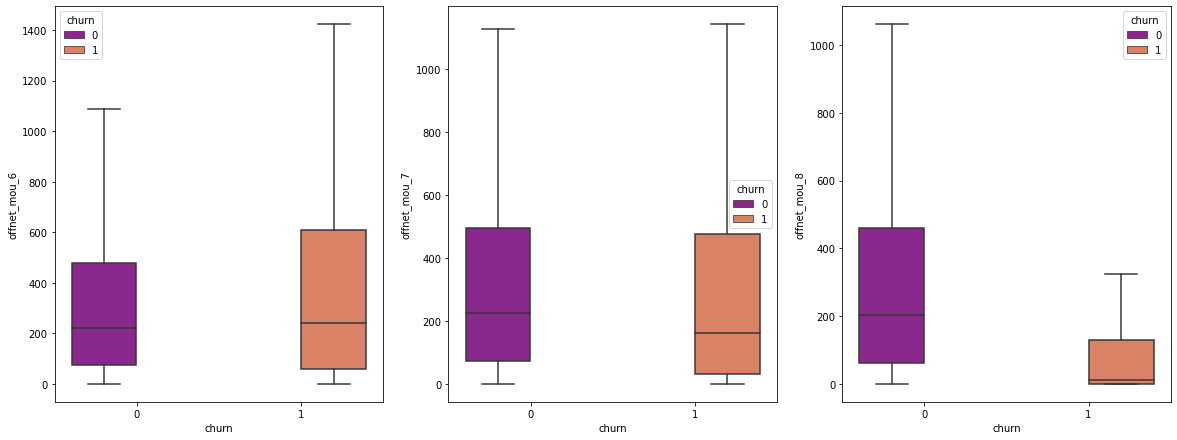

In [76]:
# Offnet mou values for churned and non churned customers
plot_box_chart('offnet_mou')

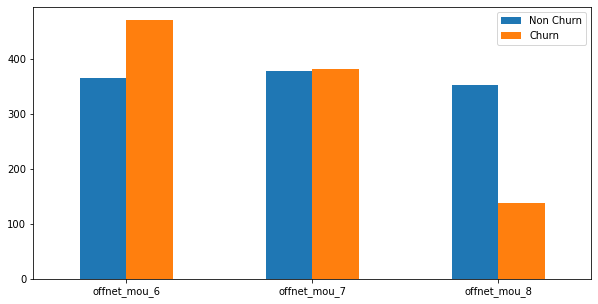

,offnet_mou_6,offnet_mou_7,offnet_mou_8
Non Churn,365.046203,377.809741,352.510204
Churn,471.331073,381.416104,138.248751


In [77]:
plot_mean_bar_chart(telecom_df_high_val_cust, offnet_usage_service_col)

We can see the drop for offnet mou services in the 8th month

#### F. ONNET : All kind of calls within the same operator network

In [78]:
#minutes of usage related columns
onnet_usage_service =  telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('^onnet.*mou',regex=True)]

In [79]:
onnet_usage_service

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'], dtype='object')

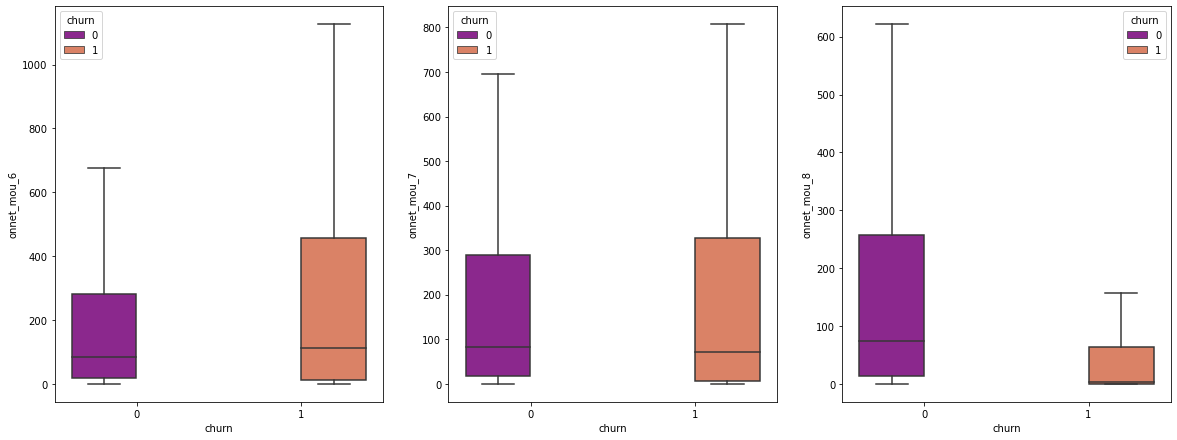

In [80]:
# Plotting onnnet
plot_box_chart('onnet_mou')

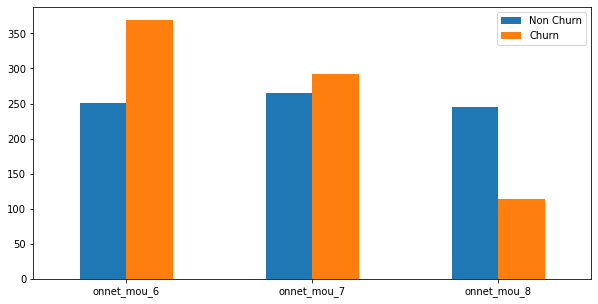

,onnet_mou_6,onnet_mou_7,onnet_mou_8
Non Churn,251.203938,265.641432,244.819433
Churn,369.058173,292.408353,113.226846


In [81]:

plot_mean_bar_chart(telecom_df_high_val_cust, onnet_usage_service)

 We also see that there is a drop in Onnet usage in the 8th month for churned customers

#### G.Tenure Analysis for Customers

In [82]:
tenure_data = telecom_df_high_val_cust.copy()

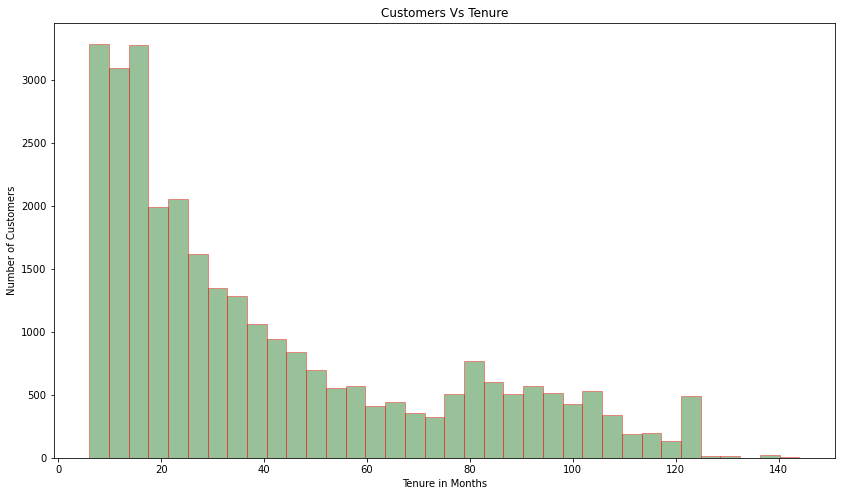

In [83]:
plt.figure(figsize=(14,8))
# aon --> Age on network - number of days the customer is using the operator T network
tenure_data['tenure'] = tenure_data['aon']/30
tenure_data['tenure'].head()
ax = sns.distplot(tenure_data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkgreen', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in Months')
ax.set_title('Customers Vs Tenure')
plt.show()

In [84]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_data['tenure_range'] = pd.cut(tenure_data['tenure'], tn_range, labels=tn_label)
tenure_data['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

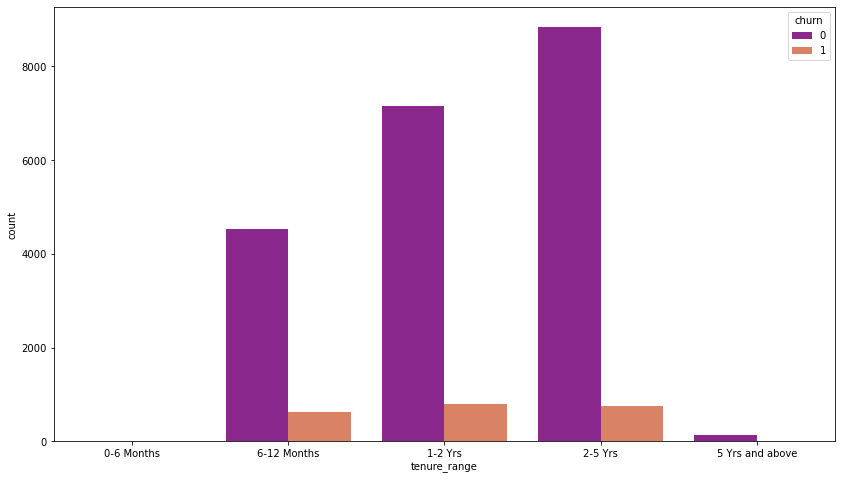

In [85]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure_data,palette=("plasma"))
plt.show()

We can see that Customers who stays more than 5 years do not usually chrurn in comparision to those who stay for a lesser period of time.

#### Now lets check columns with more than 30% values

In [86]:
meta_df = get_meta_data(telecom_df_high_val_cust)
meta_df = meta_df[meta_df["Null_Percentage"] > 30]
meta_df.sort_values(["Null_Percentage"], axis=0,ascending=False, inplace=True)
col_to_display = ['Null_Percentage']
meta_df[col_to_display]

,Null_Percentage
date_of_last_rech_data_8,46.825106
night_pck_user_8,46.825106
fb_user_8,46.825106
total_rech_data_amt_8,46.825106
date_of_last_rech_data_6,44.148528
night_pck_user_6,44.148528
fb_user_6,44.148528
total_rech_data_amt_6,44.148528
date_of_last_rech_data_7,43.145228
night_pck_user_7,43.145228


In [87]:
#Dropping 30% column
is_more_30 = meta_df.index
telecom_df_high_val_cust.drop(telecom_df_high_val_cust[is_more_30],axis=1,inplace=True)

In [88]:
telecom_df_high_val_cust.shape

(30001, 120)

#### Replacing NaN values

In [89]:
meta_df = get_meta_data(telecom_df_high_val_cust)
meta_df = meta_df[meta_df["Null_Percentage"] > 0]
meta_df.sort_values(["Null_Percentage"], axis=0,ascending=False, inplace=True)
col_to_display = ['Null_Percentage']
meta_df[col_to_display]

,Null_Percentage
og_others_8,3.913203
ic_others_8,3.913203
date_of_last_rech_8,1.943269
og_others_6,1.816606
ic_others_6,1.816606
og_others_7,1.789940
ic_others_7,1.789940
date_of_last_rech_7,0.326656
date_of_last_rech_6,0.243325


In [90]:
telecom_df_high_val_cust[meta_df.index].head(3)

,og_others_8,ic_others_8,date_of_last_rech_8,og_others_6,ic_others_6,og_others_7,ic_others_7,date_of_last_rech_7,date_of_last_rech_6
0,0.0,0.00,2014-08-08,NaN,NaN,NaN,NaN,2014-07-16,2014-06-21
7,0.0,15.14,2014-08-26,0.0,15.74,0.0,15.19,2014-07-25,2014-06-27
8,0.0,0.00,2014-08-30,0.0,0.00,0.0,0.00,2014-07-31,2014-06-25


#### Imputing Numeric fields with relevant values

In [91]:
numberic_col = ['og_others_8', 'ic_others_8', 'og_others_6','ic_others_6', 'og_others_7', 'ic_others_7']

Replacing NaN values with zero for all numeric data as most of the data is clean and will not impact the analysis

In [92]:
for i in numberic_col:
    telecom_df_high_val_cust.loc[telecom_df_high_val_cust[i].isnull(),i]=0

In [93]:
telecom_df_high_val_cust[meta_df.index].head(3)

,og_others_8,ic_others_8,date_of_last_rech_8,og_others_6,ic_others_6,og_others_7,ic_others_7,date_of_last_rech_7,date_of_last_rech_6
0,0.0,0.00,2014-08-08,0.0,0.00,0.0,0.00,2014-07-16,2014-06-21
7,0.0,15.14,2014-08-26,0.0,15.74,0.0,15.19,2014-07-25,2014-06-27
8,0.0,0.00,2014-08-30,0.0,0.00,0.0,0.00,2014-07-31,2014-06-25


In [94]:
meta_df = get_meta_data(telecom_df_high_val_cust)
meta_df = meta_df[meta_df["Null_Percentage"] > 0]
meta_df.sort_values(["Null_Percentage"], axis=0,ascending=False, inplace=True)
col_to_display = ['Null_Percentage']
meta_df[col_to_display]

,Null_Percentage
date_of_last_rech_8,1.943269
date_of_last_rech_7,0.326656
date_of_last_rech_6,0.243325


In [95]:
get_meta_data(telecom_df_high_val_cust)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count,Variable_Type,frequency
mobile_number,int64,30001,0,0.0,30001,Contineous,0
arpu_6,float64,30001,0,0.0,29072,Contineous,0
arpu_7,float64,30001,0,0.0,29084,Contineous,0
arpu_8,float64,30001,0,0.0,28073,Contineous,0
onnet_mou_6,float64,30001,0,0.0,16890,Contineous,0
...,...,...,...,...,...,...,...
aon,int64,30001,0,0.0,3294,Contineous,0
vbc_3g_8,float64,30001,0,0.0,9840,Contineous,0
vbc_3g_7,float64,30001,0,0.0,10007,Contineous,0
vbc_3g_6,float64,30001,0,0.0,9285,Contineous,0


As we can see that, we have handled most of the missing values, we are good to proceed further

### Deriving new features

In [96]:
telecom_df_final = telecom_df_high_val_cust.copy()
print(telecom_df_final.shape)
telecom_df_final.head(3)

(30001, 120)


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,...,1,1,0,0,0,968,30.40,0.00,101.20,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0,0,802,57.74,19.38,18.74,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0,0,0,0,0,315,21.03,910.65,122.16,0


In [97]:
telecom_df_final.drop(telecom_df_high_val_cust.filter(regex='date_').columns,axis=1,inplace=True)
print (telecom_df_final.shape)

col_list = telecom_df_final.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    telecom_df_final[avg_col_name] = (telecom_df_final[col_6]  + telecom_df_final[col_7])/ 2

(30001, 117)
arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
av_rech_amt_data
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g


In [98]:
col_list_to_drop = telecom_df_final.filter(regex='_6|_7')
telecom_df_final.drop(col_list_to_drop,axis=1,inplace=True)
print (telecom_df_final.shape)

(30001, 79)


In [99]:
telecom_df_final.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,...,avg_total_rech_data_av67,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67
0,7000842753,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.0,252.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,50.600
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,...,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,19.060
8,7001524846,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,...,1.0,77.0,88.5,178.000,375.475,0.5,0.5,0.0,0.0,516.405
21,7002124215,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,...,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000
23,7000887461,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,...,1.0,89.5,178.0,0.240,299.545,0.0,0.0,1.0,0.0,25.930


**We have merged most of the columns related to month 6 & 7 so to reduce the number of features. By doing this apporach we have reduced the fetures from 124 to 79.**

### Modelling

In [100]:
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [101]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [102]:
def getModelMetrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))

In [103]:
def predictChurnWithProb(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

In [104]:
def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [105]:
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

In [106]:
# creating copy of the final telecom_df_final dataframe
telecom_pca_df = telecom_df_final.copy()
# removing the columns not required for modeling
telecom_pca_df.drop(['mobile_number'], axis=1, inplace=True)

In [107]:
# removing the datatime columns before PCA
dateTimeCols = list(telecom_pca_df.select_dtypes(include=['datetime64']).columns)
telecom_pca_df.drop(dateTimeCols, axis=1, inplace=True)

In [108]:
get_meta_data(telecom_pca_df)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count,Variable_Type,frequency
arpu_8,float64,30001,0,0.0,28073,Contineous,0
onnet_mou_8,float64,30001,0,0.0,15872,Contineous,0
offnet_mou_8,float64,30001,0,0.0,20163,Contineous,0
roam_ic_mou_8,float64,30001,0,0.0,3433,Contineous,0
roam_og_mou_8,float64,30001,0,0.0,4001,Contineous,0
...,...,...,...,...,...,...,...
avg_monthly_2g_av67,float64,30001,0,0.0,9,Categorical,0
avg_sachet_2g_av67,float64,30001,0,0.0,55,Contineous,0
avg_monthly_3g_av67,float64,30001,0,0.0,20,Contineous,0
avg_sachet_3g_av67,float64,30001,0,0.0,42,Contineous,0


In [109]:
telecom_pca_df.shape

(30001, 78)

#### Train-Test Splitting of data

In [110]:
#putting features variables in X
X = telecom_pca_df.drop(['churn'], axis=1)

#putting response variables in Y
y = telecom_pca_df['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [111]:
X_train.columns

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8',
       'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon', 'vbc_3g_8',
       'avg_arpu_av67', 'avg_onnet_mou_av67', 'avg_offnet_mou_av67',
       'avg_roam_ic_mou_av67', 'avg_roam_og_mou_av67',
       'avg_loc_og_t2t_mou_av67', 'avg_loc_og_t2m_mou_av67',
       'avg_loc_og_t2f_mou_av67', 'avg_loc_og_t2c_mou_av

### Logistic Regression without PCA

In [112]:
#Importing Libraries

import statsmodels.api as smd

In [113]:
# Logistic regression model
logm1 = smd.GLM(y_train,(smd.add_constant(X_train)), family = smd.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20924
Model Family:                Binomial   Df Model:                           75
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3833.5
Date:                Mon, 30 Nov 2020   Deviance:                       7667.0
Time:                        21:05:09   Pearson chi2:                 3.19e+11
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.8927      0.096     -9.337      0.000      -1.080      -0.705
arpu_8                       -0.0005      0.000     -1.494      0.135      -0.001       0.000
onnet_mou_8                  -0.0133      0.005     -2.613      0.009      -0.023      -0.003
offnet_mou_8                 -0.0144      0.005     -2.872      0.004      -0.024      -0.005
roam_ic_mou_8                -0.0004      0.000     -0.969      0.333      -0.001       0.000
roam_og_mou_8                 0.0144      0.005      2.837      0.005       0.004       0.024
loc_og_t2t_mou_8              0.0118      0.005      2.294      0.022       0.002       0.022
loc_og_t2m_mou_8              0.0115      0.005      2.259      0.024       0.002       0.021
loc_og_t2f_mou_8              0.0130      0.007      1.988      0.047       0.000       0.026
loc_og_t2c_mou_8              0.0140      0.007      1.867      0.062      -0.001       0.029
std_og_t2t_mou_8              0.0128      0.005      2.503      0.012       0.003       0.023
std_og_t2m_mou_8              0.0135      0.005      2.670      0.008       0.004       0.023
std_og_t2f_mou_8             -0.0042      0.012     -0.358      0.720      -0.027       0.019
isd_og_mou_8                  0.0102      0.005      2.083      0.037       0.001       0.020
spl_og_mou_8                  0.0013      0.005      0.245      0.806      -0.009       0.011
og_others_8                   0.0199      0.008      2.581      0.010       0.005       0.035
loc_ic_t2t_mou_8             -0.0070      0.001     -5.505      0.000      -0.010      -0.005
loc_ic_t2m_mou_8             -0.0061      0.001     -8.200      0.000      -0.008      -0.005
loc_ic_t2f_mou_8             -0.0100      0.003     -2.991      0.003      -0.017      -0.003
std_ic_t2t_mou_8             -0.0056      0.002     -3.335      0.001      -0.009      -0.002
std_ic_t2m_mou_8             -0.0019      0.001     -2.293      0.022      -0.004      -0.000
std_ic_t2f_mou_8             -0.0162      0.008     -2.001      0.045      -0.032      -0.000
spl_ic_mou_8                 -3.0900      0.555     -5.568      0.000      -4.178      -2.002
isd_ic_mou_8                 -0.0010      0.001     -0.992      0.321      -0.003       0.001
ic_others_8                   0.0059      0.006      1.039      0.299      -0.005       0.017
total_rech_num_8             -0.0485      0.009     -5.556      0.000      -0.066      -0.031
total_rech_amt_8          -8.461e-05      0.000     -0.291      0.771      -0.001       0.000
max_rech_amt_8                0.0001      0.000      0.280      0.779      -0.001       0.001
last_day_rch_amt_8           -0.0026      0.000     -6.445      0.000      -0.003      -0.002
total_rech_data_8            -0.4254      0.076     -5.592      0.000      

In [114]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#Using RFE to get top 20 important variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [115]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
       False, False,  True,  True, False, False,  True, False, False,
       False,  True, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
        True,  True, False,  True, False])

In [116]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 49),
 ('onnet_mou_8', False, 26),
 ('offnet_mou_8', False, 22),
 ('roam_ic_mou_8', False, 56),
 ('roam_og_mou_8', False, 21),
 ('loc_og_t2t_mou_8', False, 60),
 ('loc_og_t2m_mou_8', False, 41),
 ('loc_og_t2f_mou_8', False, 63),
 ('loc_og_t2c_mou_8', False, 39),
 ('std_og_t2t_mou_8', False, 28),
 ('std_og_t2m_mou_8', False, 23),
 ('std_og_t2f_mou_8', True, 1),
 ('isd_og_mou_8', False, 42),
 ('spl_og_mou_8', False, 3),
 ('og_others_8', False, 2),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', False, 5),
 ('loc_ic_t2f_mou_8', True, 1),
 ('std_ic_t2t_mou_8', False, 11),
 ('std_ic_t2m_mou_8', False, 15),
 ('std_ic_t2f_mou_8', True, 1),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 31),
 ('ic_others_8', False, 17),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', False, 34),
 ('max_rech_amt_8', False, 50),
 ('last_day_rch_amt_8', False, 9),
 ('total_rech_data_8', True, 1),
 ('max_rech_data_8', False, 53),
 ('av_rech_amt_data_8', False, 10),
 ('vol_2g_mb_

In [117]:
#Columns which are included
col = X_train.columns[rfe.support_]
col

Index(['std_og_t2f_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2f_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'total_rech_data_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'avg_total_rech_num_av67', 'avg_total_rech_data_av67',
       'avg_monthly_2g_av67', 'avg_sachet_2g_av67', 'avg_sachet_3g_av67'],
      dtype='object')

In [118]:
#Assessing the model
X_train_sm = smd.add_constant(X_train[col])
logm2 = smd.GLM(y_train,X_train_sm, family = smd.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4352.7
Date:                Mon, 30 Nov 2020   Deviance:                       8705.4
Time:                        21:05:29   Pearson chi2:                 1.37e+11
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.8833      0.061    -14.375      0.000      -1.004      -0.763
std_og_t2f_mou_8            -0.0270      0.010     -2.824      0.005      -0.046      -0.008
loc_ic_t2t_mou_8            -0.0187      0.001    -14.367      0.000      -0.021      -0.016
loc_ic_t2f_mou_8            -0.0281      0.004     -7.825      0.000      -0.035      -0.021
std_ic_t2f_mou_8            -0.0199      0.009     -2.223      0.026      -0.037      -0.002
spl_ic_mou_8                -3.0513      0.541     -5.635      0.000      -4.113      -1.990
total_rech_num_8            -0.1400      0.007    -20.397      0.000      -0.153      -0.127
total_rech_data_8           -0.3166      0.085     -3.729      0.000      -0.483      -0.150
monthly_2g_8                -1.4622      0.198     -7.399      0.000      -1.850      -1.075
sachet_2g_8                  0.0135      0.095      0.142      0.887      -0.172       0.199
monthly_3g_8                -0.8154      0.140     -5.815      0.000      -1.090      -0.541
avg_total_rech_num_av67      0.0585      0.004     13.506      0.000       0.050       0.067
avg_total_rech_data_av67     0.0904      0.074      1.224      0.221      -0.054       0.235
avg_monthly_2g_av67         -0.4328      0.130     -3.338      0.001      -0.687      -0.179
avg_sachet_2g_av67          -0.0731      0.074     -0.985      0.325      -0.219       0.072
avg_sachet_3g_av67           0.0404      0.088      0.458      0.647      -0.132       0.213
============================================================================================
"""

In [119]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,avg_total_rech_data_av67,61.32
13,avg_sachet_2g_av67,43.58
6,total_rech_data_8,18.15
8,sachet_2g_8,15.90
14,avg_sachet_3g_av67,7.34
5,total_rech_num_8,5.55
10,avg_total_rech_num_av67,5.47
9,monthly_3g_8,2.91
12,avg_monthly_2g_av67,2.68
7,monthly_2g_8,2.09


In [120]:
col = col.drop('sachet_2g_8')

In [121]:
#Assessing the model
X_train_sm = smd.add_constant(X_train[col])
logm2 = smd.GLM(y_train,X_train_sm, family = smd.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4352.7
Date:                Mon, 30 Nov 2020   Deviance:                       8705.4
Time:                        21:05:29   Pearson chi2:                 1.37e+11
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.8834      0.061    -14.379      0.000      -1.004      -0.763
std_og_t2f_mou_8            -0.0270      0.010     -2.824      0.005      -0.046      -0.008
loc_ic_t2t_mou_8            -0.0187      0.001    -14.366      0.000      -0.021      -0.016
loc_ic_t2f_mou_8            -0.0281      0.004     -7.828      0.000      -0.035      -0.021
std_ic_t2f_mou_8            -0.0199      0.009     -2.223      0.026      -0.037      -0.002
spl_ic_mou_8                -3.0516      0.541     -5.636      0.000      -4.113      -1.990
total_rech_num_8            -0.1400      0.007    -20.399      0.000      -0.153      -0.127
total_rech_data_8           -0.3054      0.031     -9.694      0.000      -0.367      -0.244
monthly_2g_8                -1.4733      0.182     -8.107      0.000      -1.829      -1.117
monthly_3g_8                -0.8265      0.117     -7.087      0.000      -1.055      -0.598
avg_total_rech_num_av67      0.0585      0.004     13.508      0.000       0.050       0.067
avg_total_rech_data_av67     0.0903      0.074      1.223      0.221      -0.054       0.235
avg_monthly_2g_av67         -0.4326      0.130     -3.337      0.001      -0.687      -0.179
avg_sachet_2g_av67          -0.0725      0.074     -0.978      0.328      -0.218       0.073
avg_sachet_3g_av67           0.0369      0.085      0.436      0.663      -0.129       0.203
============================================================================================
"""

In [122]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,avg_total_rech_data_av67,61.32
12,avg_sachet_2g_av67,43.28
13,avg_sachet_3g_av67,6.75
5,total_rech_num_8,5.55
9,avg_total_rech_num_av67,5.47
6,total_rech_data_8,3.22
11,avg_monthly_2g_av67,2.68
8,monthly_3g_8,2.27
7,monthly_2g_8,1.84
1,loc_ic_t2t_mou_8,1.15


In [123]:
col = col.drop('avg_total_rech_data_av67')

In [124]:
#Assessing the model
X_train_sm = smd.add_constant(X_train[col])
logm2 = smd.GLM(y_train,X_train_sm, family = smd.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4353.4
Date:                Mon, 30 Nov 2020   Deviance:                       8706.9
Time:                        21:05:30   Pearson chi2:                 1.65e+11
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.8629      0.059    -14.596      0.000      -0.979      -0.747
std_og_t2f_mou_8           -0.0272      0.010     -2.838      0.005      -0.046      -0.008
loc_ic_t2t_mou_8           -0.0188      0.001    -14.409      0.000      -0.021      -0.016
loc_ic_t2f_mou_8           -0.0281      0.004     -7.824      0.000      -0.035      -0.021
std_ic_t2f_mou_8           -0.0197      0.009     -2.210      0.027      -0.037      -0.002
spl_ic_mou_8               -3.0570      0.541     -5.647      0.000      -4.118      -1.996
total_rech_num_8           -0.1407      0.007    -20.544      0.000      -0.154      -0.127
total_rech_data_8          -0.3047      0.032     -9.669      0.000      -0.366      -0.243
monthly_2g_8               -1.4650      0.182     -8.065      0.000      -1.821      -1.109
monthly_3g_8               -0.7556      0.100     -7.535      0.000      -0.952      -0.559
avg_total_rech_num_av67     0.0581      0.004     13.457      0.000       0.050       0.067
avg_monthly_2g_av67        -0.3536      0.112     -3.146      0.002      -0.574      -0.133
avg_sachet_2g_av67          0.0160      0.016      1.001      0.317      -0.015       0.047
avg_sachet_3g_av67          0.1290      0.038      3.363      0.001       0.054       0.204
===========================================================================================
"""

In [125]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_rech_num_8,5.51
9,avg_total_rech_num_av67,5.38
6,total_rech_data_8,3.21
11,avg_sachet_2g_av67,2.43
10,avg_monthly_2g_av67,1.87
7,monthly_2g_8,1.83
12,avg_sachet_3g_av67,1.29
8,monthly_3g_8,1.17
1,loc_ic_t2t_mou_8,1.15
0,std_og_t2f_mou_8,1.12


In [126]:
col = col.drop('avg_sachet_2g_av67')

In [127]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_rech_num_8,5.19
9,avg_total_rech_num_av67,4.74
10,avg_monthly_2g_av67,1.86
7,monthly_2g_8,1.82
6,total_rech_data_8,1.74
11,avg_sachet_3g_av67,1.25
1,loc_ic_t2t_mou_8,1.15
0,std_og_t2f_mou_8,1.12
3,std_ic_t2f_mou_8,1.12
2,loc_ic_t2f_mou_8,1.10


In [128]:
#Assessing the model
X_train_sm = smd.add_constant(X_train[col])
logm2 = smd.GLM(y_train,X_train_sm, family = smd.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20987
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4353.9
Date:                Mon, 30 Nov 2020   Deviance:                       8707.8
Time:                        21:05:31   Pearson chi2:                 1.78e+11
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.8546      0.059    -14.605      0.000      -0.969      -0.740
std_og_t2f_mou_8           -0.0273      0.010     -2.851      0.004      -0.046      -0.009
loc_ic_t2t_mou_8           -0.0188      0.001    -14.446      0.000      -0.021      -0.016
loc_ic_t2f_mou_8           -0.0282      0.004     -7.842      0.000      -0.035      -0.021
std_ic_t2f_mou_8           -0.0198      0.009     -2.214      0.027      -0.037      -0.002
spl_ic_mou_8               -3.0441      0.541     -5.630      0.000      -4.104      -1.984
total_rech_num_8           -0.1418      0.007    -20.963      0.000      -0.155      -0.129
total_rech_data_8          -0.2912      0.028    -10.257      0.000      -0.347      -0.236
monthly_2g_8               -1.4706      0.182     -8.096      0.000      -1.827      -1.115
monthly_3g_8               -0.7721      0.099     -7.806      0.000      -0.966      -0.578
avg_total_rech_num_av67     0.0589      0.004     13.869      0.000       0.051       0.067
avg_monthly_2g_av67        -0.3586      0.112     -3.194      0.001      -0.579      -0.139
avg_sachet_3g_av67          0.1281      0.038      3.360      0.001       0.053       0.203
===========================================================================================
"""

In [129]:
col = col.drop('std_ic_t2f_mou_8')

In [130]:
#Assessing the model
X_train_sm = smd.add_constant(X_train[col])
logm2 = smd.GLM(y_train,X_train_sm, family = smd.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4357.9
Date:                Mon, 30 Nov 2020   Deviance:                       8715.7
Time:                        21:05:31   Pearson chi2:                 1.65e+11
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.8624      0.058    -14.751      0.000      -0.977      -0.748
std_og_t2f_mou_8           -0.0328      0.010     -3.381      0.001      -0.052      -0.014
loc_ic_t2t_mou_8           -0.0190      0.001    -14.585      0.000      -0.022      -0.016
loc_ic_t2f_mou_8           -0.0295      0.004     -8.187      0.000      -0.037      -0.022
spl_ic_mou_8               -3.0378      0.541     -5.618      0.000      -4.098      -1.978
total_rech_num_8           -0.1420      0.007    -20.969      0.000      -0.155      -0.129
total_rech_data_8          -0.2916      0.028    -10.260      0.000      -0.347      -0.236
monthly_2g_8               -1.4741      0.182     -8.118      0.000      -1.830      -1.118
monthly_3g_8               -0.7769      0.099     -7.854      0.000      -0.971      -0.583
avg_total_rech_num_av67     0.0593      0.004     13.930      0.000       0.051       0.068
avg_monthly_2g_av67        -0.3591      0.112     -3.201      0.001      -0.579      -0.139
avg_sachet_3g_av67          0.1283      0.038      3.364      0.001       0.054       0.203
===========================================================================================
"""

In [131]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_rech_num_8,5.19
8,avg_total_rech_num_av67,4.74
9,avg_monthly_2g_av67,1.86
6,monthly_2g_8,1.82
5,total_rech_data_8,1.74
10,avg_sachet_3g_av67,1.25
1,loc_ic_t2t_mou_8,1.15
2,loc_ic_t2f_mou_8,1.10
7,monthly_3g_8,1.10
3,spl_ic_mou_8,1.06


In [132]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:11]

39186    1.366949e-01
39833    7.446840e-02
38778    5.705516e-02
43026    1.656400e-12
12271    1.229127e-04
33607    1.834739e-03
51913    6.070713e-04
16668    9.521265e-04
54924    2.178694e-02
33733    3.527231e-02
25511    1.108539e-05
dtype: float64

In [133]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.36694911e-01, 7.44684048e-02, 5.70551643e-02, 1.65639986e-12,
       1.22912712e-04, 1.83473906e-03, 6.07071325e-04, 9.52126463e-04,
       2.17869448e-02, 3.52723057e-02])

In [134]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,1.366949e-01,39186
1,0,7.446840e-02,39833
2,0,5.705516e-02,38778
3,0,1.656400e-12,43026
4,0,1.229127e-04,12271


In [135]:
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Prospect ID'] = y_train.index
    y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,1.366949e-01,39186
1,0,7.446840e-02,39833
2,0,5.705516e-02,38778
3,0,1.656400e-12,43026
4,0,1.229127e-04,12271


In [136]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,1.366949e-01,39186,0
1,0,7.446840e-02,39833,0
2,0,5.705516e-02,38778,0
3,0,1.656400e-12,43026,0
4,0,1.229127e-04,12271,0


In [137]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[19230    79]
 [ 1539   152]]


In [138]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.922952380952381


In [139]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [140]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.0898876404494382


In [141]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.995908643637682


In [142]:
y_train_pred_final1 = y_train_pred_final.copy()

In [143]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [144]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final1.Converted, y_train_pred_final1.Converted_prob, drop_intermediate = False )

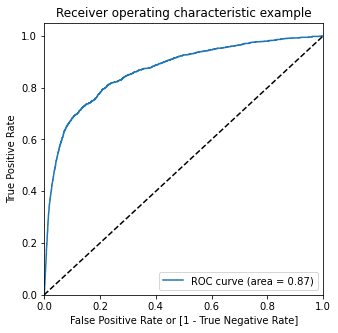

In [145]:
draw_roc(y_train_pred_final1.Converted, y_train_pred_final1.Converted_prob)

In [146]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final1[i]= y_train_pred_final1.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final1.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,1.366949e-01,39186,0,1,1,0,0,0,0,0,0,0,0
1,0,7.446840e-02,39833,0,1,0,0,0,0,0,0,0,0,0
2,0,5.705516e-02,38778,0,1,0,0,0,0,0,0,0,0,0
3,0,1.656400e-12,43026,0,1,0,0,0,0,0,0,0,0,0
4,0,1.229127e-04,12271,0,1,0,0,0,0,0,0,0,0,0


In [147]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final1.Converted, y_train_pred_final1[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.080524  1.000000  0.000000
0.1   0.1  0.778762  0.804258  0.776529
0.2   0.2  0.891714  0.662330  0.911803
0.3   0.3  0.926190  0.448847  0.967994
0.4   0.4  0.926762  0.196925  0.990678
0.5   0.5  0.922952  0.089888  0.995909
0.6   0.6  0.920905  0.039622  0.998084
0.7   0.7  0.919857  0.014784  0.999120
0.8   0.8  0.919571  0.005322  0.999637
0.9   0.9  0.919524  0.002957  0.999793


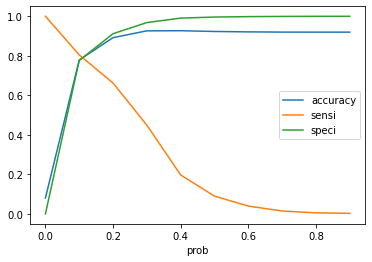

In [148]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [149]:
y_train_pred_final1['final_predicted'] = y_train_pred_final1.Converted_prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final1.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,1.366949e-01,39186,0,1,1,0,0,0,0,0,0,0,0,1
1,0,7.446840e-02,39833,0,1,0,0,0,0,0,0,0,0,0,0
2,0,5.705516e-02,38778,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1.656400e-12,43026,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1.229127e-04,12271,0,1,0,0,0,0,0,0,0,0,0,0


In [150]:
y_train_pred_final1['Lead_Score'] = y_train_pred_final1.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final1.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,1.366949e-01,39186,0,1,1,0,0,0,0,0,0,0,0,1,14
1,0,7.446840e-02,39833,0,1,0,0,0,0,0,0,0,0,0,0,7
2,0,5.705516e-02,38778,0,1,0,0,0,0,0,0,0,0,0,0,6
3,0,1.656400e-12,43026,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1.229127e-04,12271,0,1,0,0,0,0,0,0,0,0,0,0,0


In [151]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final1.Converted, y_train_pred_final1.final_predicted))

Accuracy : 0.7787619047619048


In [152]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final1.Converted, y_train_pred_final1.final_predicted )
confusion2

array([[14994,  4315],
       [  331,  1360]], dtype=int64)

In [153]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [154]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8042578356002366


In [155]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7765290797037651


In [156]:
X_test1 = X_test[col]
X_test1.head()

,std_og_t2f_mou_8,loc_ic_t2t_mou_8,loc_ic_t2f_mou_8,spl_ic_mou_8,total_rech_num_8,total_rech_data_8,monthly_2g_8,monthly_3g_8,avg_total_rech_num_av67,avg_monthly_2g_av67,avg_sachet_3g_av67
20296,0.91,2.64,22.96,0.0,4,0.0,0,0,11.5,0.0,0.0
8279,0.00,5.78,0.00,0.0,7,3.0,0,0,11.0,0.0,0.0
72269,9.41,31.31,14.19,0.0,8,0.0,0,0,10.0,0.0,1.5
65602,0.00,23.79,2.03,0.0,23,0.0,0,0,20.0,0.0,0.0
42758,0.00,0.28,0.00,0.0,2,0.0,0,0,15.5,1.0,0.0


In [157]:
# Adding a const
X_test_sm = smd.add_constant(X_test1)

In [158]:
X_test_sm.shape

(9001, 12)

In [159]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:11]

20296    0.181683
8279     0.100752
72269    0.073478
65602    0.030654
42758    0.356126
80210    0.000483
67925    0.016840
25034    0.010809
10422    0.003629
43140    0.273372
30051    0.009206
dtype: float64

In [160]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [161]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [162]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [163]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [164]:
y_pred_final.head()

,churn,0
0,1,0.181683
1,1,0.100752
2,0,0.073478
3,0,0.030654
4,1,0.356126


In [165]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [166]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['churn','Converted_prob'])

In [167]:
# Let's see the head of y_pred_final
y_pred_final.head()

,churn,Converted_prob
0,1,0.181683
1,1,0.100752
2,0,0.073478
3,0,0.030654
4,1,0.356126


In [168]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.1 else 0)

In [169]:
y_pred_final.head()

,churn,Converted_prob,final_predicted
0,1,0.181683,1
1,1,0.100752,1
2,0,0.073478,0
3,0,0.030654,0
4,1,0.356126,1


In [170]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted))

Accuracy : 0.7824686145983779


In [171]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[6447, 1804],
       [ 154,  596]], dtype=int64)

In [172]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [173]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7946666666666666


In [174]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7813598351714943


In [175]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,churn,Converted_prob,final_predicted,Lead_Score
0,1,0.181683,1,18
1,1,0.100752,1,10
2,0,0.073478,0,7
3,0,0.030654,0,3
4,1,0.356126,1,36


**Train Data Sensitivity :  80%**

**Test Data Sensitivity: 79.4%**

### Modelling with PCA

#### Rescaling Features

In [176]:
#Rescaling the features before PCA as it is sensitive to the scales of the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [177]:
# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

### Handling Class imbalance

Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

#### Informed Over Sampling: Synthetic Minority Over-sampling Technique

This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.

**Advantages**

- Mitigates the problem of overfitting caused by random oversampling as synthetic examples are generated rather than replication of instances
- No loss of useful information

In [178]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 1691
Before OverSampling, counts of label '0': 19309 

Before OverSampling, churn event rate : 8.05% 



In [179]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [180]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (38618, 77)
After OverSampling, the shape of train_y: (38618,) 

After OverSampling, counts of label '1': 19309
After OverSampling, counts of label '0': 19309
After OverSampling, churn event rate : 50.0% 



### PCA: Principal Component Analysis

In [181]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [182]:
#Doing the PCA on the train data
pca.fit(X_train_res)

PCA(random_state=42, svd_solver='randomized')

We'll let PCA select the number of components basen on a variance cutoff we provide

Looking at the screeplot to assess the number of needed principal components

In [183]:
pca.explained_variance_ratio_[:50]

array([0.32328058, 0.11749503, 0.06887003, 0.06275167, 0.05855644,
       0.05363977, 0.03387652, 0.02819384, 0.02163332, 0.01992636,
       0.01508905, 0.01423334, 0.01336556, 0.01293213, 0.011918  ,
       0.01062606, 0.01005581, 0.00985874, 0.00792021, 0.00761099,
       0.0069082 , 0.00667603, 0.00639422, 0.00608298, 0.00561773,
       0.00545597, 0.00528214, 0.00396657, 0.00377362, 0.00335739,
       0.0031018 , 0.00284865, 0.00270242, 0.00220001, 0.00206319,
       0.00203703, 0.00189237, 0.00183988, 0.00179382, 0.00174569,
       0.00168092, 0.00163987, 0.00160314, 0.00152456, 0.00147864,
       0.00143952, 0.00141181, 0.00116729, 0.00104789, 0.00103001])

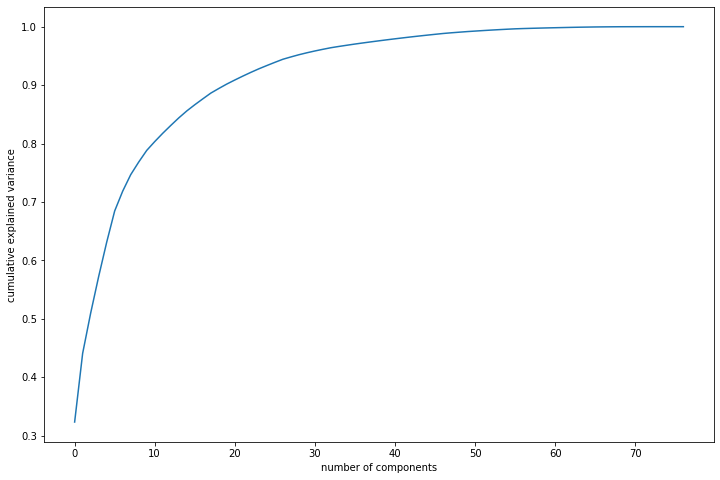

In [184]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**Looks like 50 components are enough to describe 95% of the variance in the dataset**

We'll choose 50 components for our modeling

In [185]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)

In [186]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(38618, 50)

In [187]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.019937304441268355 , min corr:  -0.009401459739371105


Indeed - there is no correlation between any two components! We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [188]:
#Applying selected components to the test data - 50 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 50)

**For the prediction of churn customers we will be fitting variety of models and select one which is the best predictor of churn. Models trained are,**

1. Logistic Regression
2. Decision Tree
3. Boosting model - XGBoost Classifier

### 1. Logistic Regression with PCA

In [189]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr0 = LogisticRegression(class_weight='balanced')

In [190]:
modelfit(lr0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8335
Recall/Sensitivity : 0.8566
AUC Score (Train): 0.908016
CV Score : Mean - 0.9067173 | Std - 0.004079056 | Min - 0.8987827 | Max - 0.9103797


In [191]:
# predictions on Test data
pred_probs_test = lr0.predict(X_test_pca)
getModelMetrics(y_test,pred_probs_test)

Roc_auc_score : 0.8238289500262594
Sensitivity/Recall : 0.8253333333333334
Specificity: 0.8223245667191855
False Positive Rate: 0.17767543328081445
Positive predictive value: 0.29688249400479616
Negative Predictive value: 0.9810584152689416
sklearn precision score value: 0.29688249400479616


In [192]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.8225752694145095
Recall : 0.8253333333333334
Precision : 0.29688249400479616


In [193]:
#Making prediction on the test data
pred_probs_train = lr0.predict_proba(X_train_pca)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_train)))

roc_auc_score(Train) 0.91


In [194]:
cut_off_prob=0.5
y_train_df = predictChurnWithProb(lr0,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8335491221710083
Sensitivity/Recall : 0.8566471593557409
Specificity: 0.8104510849862758
False Positive Rate: 0.18954891501372417
Positive predictive value: 0.8188208504529478
Negative Predictive value: 0.8497040777542488
sklearn precision score value: 0.8188208504529478


,churn,churn_Prob,final_predicted
0,0,0.453421,0
1,0,0.093098,0
2,0,0.303456,0
3,0,0.004581,0
4,0,0.128464,0


**Plotting the ROC Curve : An ROC curve demonstrates several things:**

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

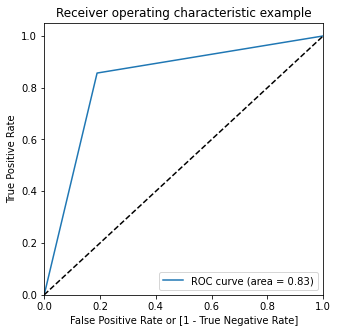

In [195]:
draw_roc(y_train_df.churn, y_train_df.final_predicted)


The roc curve is lying in the top left corner which is a sign of a good fit.

In [196]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.83


**Finding Optimal Cutoff Point**
Since recall or sensitivity is a much more important metrics for churn prediction. A trade off between sensitivity(or recall) and specificity is to be considered in doing so. We will try adjusting the probability threshold which shall lead to higher sensitivity or recall rate.

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.672251  0.981718  0.362784
0.2   0.2  0.744238  0.961365  0.527112
0.3   0.3  0.789217  0.934383  0.644052
0.4   0.4  0.818116  0.901963  0.734269
0.5   0.5  0.833549  0.856647  0.810451
0.6   0.6  0.833342  0.795070  0.871614
0.7   0.7  0.819670  0.718007  0.921332
0.8   0.8  0.763996  0.569631  0.958361
0.9   0.9  0.577037  0.162826  0.991248


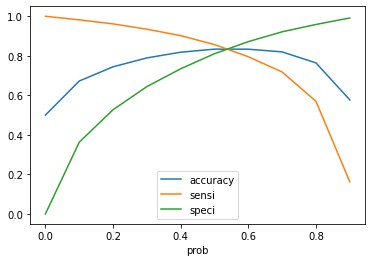

In [197]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

From the curve above, 0.45 is the optimum point

Although, other cutoff between 0.4 and 0.6 can also be taken but to keep the test sensitivity/recall significant we choose 0.45. At this point there is a balance of sensitivity, specificity and accuracy.

In [198]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.45
predictChurnWithProb(lr0,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.8266093531513803
Sensitivity/Recall : 0.8812988761717334
Specificity: 0.7719198301310269
False Positive Rate: 0.228080169868973
Positive predictive value: 0.794407357266234
Negative Predictive value: 0.8667209396987847
sklearn precision score value: 0.794407357266234


,churn,churn_Prob,final_predicted
0,0,0.453421,1
1,0,0.093098,0
2,0,0.303456,0
3,0,0.004581,0
4,0,0.128464,0
...,...,...,...
38613,1,0.791934,1
38614,1,0.765781,1
38615,1,0.199584,0
38616,1,0.773334,1


#### Making Predictions of Test data

In [199]:

# predicting with the choosen cut-off on test
predictChurnWithProb(lr0,X_test_pca,y_test,cut_off_prob)

Roc_auc_score : 0.8121950470650022
Sensitivity/Recall : 0.8426666666666667
Specificity: 0.7817234274633378
False Positive Rate: 0.21827657253666222
Positive predictive value: 0.25976161117961366
Negative Predictive value: 0.9820341047503045
sklearn precision score value: 0.25976161117961366


,churn,churn_Prob,final_predicted
20296,1,0.685633,1
8279,1,0.548009,1
72269,0,0.072731,0
65602,0,0.274201,0
42758,1,0.809540,1
...,...,...,...
40214,0,0.335578,0
59799,0,0.043388,0
18784,0,0.001315,0
4712,0,0.514339,1


The resulting model, after PCA and logistic regression (with optimal cutoff setting) has a right balance of different metrics score for sensitivity, specificity and Roc Accuracy on the train and test set.

**Train sensitivity : 88.10%, train roc auc score : 83.1%**

**Test sensitivity : 84.26%, test roc auc score : 81.21%**

### 2. Decision Tree

#### Applying Decision Tree Classifier on our principal components with Hyperparameter tuning

In [200]:
dt0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
modelfit(dt0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.7721
Recall/Sensitivity : 0.8375
AUC Score (Train): 0.841204
CV Score : Mean - 0.8429588 | Std - 0.009720696 | Min - 0.8287136 | Max - 0.8538948


In [201]:
# make predictions
pred_probs_test = dt0.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7170491657576858
Sensitivity/Recall : 0.7453333333333333
Specificity: 0.6887649981820385
False Positive Rate: 0.31123500181796143
Positive predictive value: 0.17876559002238568
Negative Predictive value: 0.9674838270343888
sklearn precision score value: 0.17876559002238568


In [202]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [203]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   16.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   37.8s
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:   58.3s finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=4,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         'min_samples_leaf': range(100, 400, 50),
                         'min_samples_split': range(100, 400, 100)},
             scoring='f1_weighted', verbose=1)

In [204]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.8091045549607836 using {'max_depth': 14, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [205]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=14,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=15,
                             random_state=10)

In [206]:
modelfit(dt_final,X_train_pca,y_train_res)


Model Report
Accuracy : 0.8363
Recall/Sensitivity : 0.8275
AUC Score (Train): 0.918366
CV Score : Mean - 0.8949134 | Std - 0.004513057 | Min - 0.8872504 | Max - 0.9012199


In [207]:
# make predictions
pred_probs_test = dt_final.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7518283036399628
Sensitivity/Recall : 0.6706666666666666
Specificity: 0.832989940613259
False Positive Rate: 0.167010059386741
Positive predictive value: 0.26741095162147793
Negative Predictive value: 0.9653089887640449
sklearn precision score value: 0.26741095162147793


In [208]:
# classification report
print(classification_report(y_test,pred_probs_test))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      8251
           1       0.27      0.67      0.38       750

    accuracy                           0.82      9001
   macro avg       0.62      0.75      0.64      9001
weighted avg       0.91      0.82      0.85      9001



Even after hyperparameter tuning for the Decision Tree. The recall rate is 67.06% which is not very significant to predict the churn.

Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [209]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8363198508467554
Sensitivity/Recall : 0.8275415609301362
Specificity: 0.8450981407633746
False Positive Rate: 0.15490185923662542
Positive predictive value: 0.8423299947285187
Negative Predictive value: 0.8305171009771987
sklearn precision score value: 0.8423299947285187


,churn,churn_Prob,final_predicted
0,0,0.062500,0
1,0,0.252941,0
2,0,0.715026,1
3,0,0.066667,0
4,0,0.325581,0


     prob  accuracy     sensi     speci
0.0   0.0  0.600135  1.000000  0.200269
0.1   0.1  0.729867  0.984567  0.475167
0.2   0.2  0.783883  0.958931  0.608835
0.3   0.3  0.810762  0.934953  0.686571
0.4   0.4  0.828008  0.897561  0.758455
0.5   0.5  0.836320  0.827542  0.845098
0.6   0.6  0.830390  0.768346  0.892434
0.7   0.7  0.817054  0.713191  0.920918
0.8   0.8  0.786007  0.621834  0.950179
0.9   0.9  0.704516  0.429489  0.979543


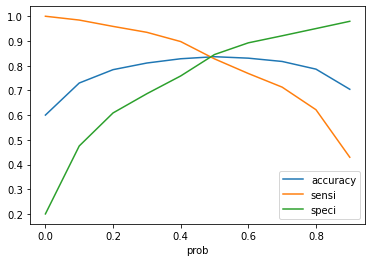

In [210]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

From the curve above, let'choose 0.4 as the optimum point to make a high enough sensitivity.

In [211]:
# predicting churn with cut-off 0.4
cut_off_prob=0.4
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8280076648195142
Sensitivity/Recall : 0.8975607229789218
Specificity: 0.7584546066601067
False Positive Rate: 0.2415453933398933
Positive predictive value: 0.7879518072289157
Negative Predictive value: 0.8810082415929736
sklearn precision score value: 0.7879518072289157


,churn,churn_Prob,final_predicted
0,0,0.062500,0
1,0,0.252941,0
2,0,0.715026,1
3,0,0.066667,0
4,0,0.325581,0


In [212]:
#Lets see how it performs on test data.
y_test_df= predictChurnWithProb(dt_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.7468636528905587
Sensitivity/Recall : 0.744
Specificity: 0.7497273057811175
False Positive Rate: 0.25027269421888254
Positive predictive value: 0.21273351124666412
Negative Predictive value: 0.9698965192850423
sklearn precision score value: 0.21273351124666412


,churn,churn_Prob,final_predicted
20296,1,0.522523,1
8279,1,0.874484,1
72269,0,0.070000,0
65602,0,0.000000,0
42758,1,0.050000,0


**Decision tree after selecting optimal cut-off also is resulting in a model with**

Train Recall : 89.75% and Train Roc_auc_score : 82.80

Test Recall : 74.00% and Test Roc_auc_score : 74.68

### 3. XGBoost Classifier

#### Applying XGBoost Classifier on our principal components with Hyperparameter tuning

In [213]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
# Fitting the XGBClassifier
xgb1 = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)

In [214]:
# Model fit and performance on Train data
modelfit(xgb1, X_train_pca, y_train_res)


Model Report
Accuracy : 1
Recall/Sensitivity : 1
AUC Score (Train): 1.000000
CV Score : Mean - 0.9901585 | Std - 0.001166506 | Min - 0.9880815 | Max - 0.991694


In [215]:
# Hyperparameter tunning for the XGBClassifer
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [216]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 0.9563250689948323)

In [217]:

# Some more hyperparameter tunning for the XGBClassifer
param_test2 = param_test3 = {'gamma':[i/10.0 for i in range(0,5)]}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch2.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=9, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [218]:
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.1}, 0.9573704197712546)

In [219]:
# Final XGBClassifier
xgb2 = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

In [220]:
# Fit Train data
modelfit(xgb2, X_train_pca, y_train_res)


Model Report
Accuracy : 0.9992
Recall/Sensitivity : 1
AUC Score (Train): 1.000000
CV Score : Mean - 0.9903044 | Std - 0.001177558 | Min - 0.9880997 | Max - 0.9916262


In [221]:
# Prediction on Test data
dtest_predictions = xgb2.predict(X_test_pca)

In [222]:
# Model evaluation on Test data
getModelMetrics(y_test,dtest_predictions)

Roc_auc_score : 0.7797004807498081
Sensitivity/Recall : 0.6173333333333333
Specificity: 0.9420676281662829
False Positive Rate: 0.057932371833717126
Positive predictive value: 0.4920297555791711
Negative Predictive value: 0.9643920595533498
sklearn precision score value: 0.4920297555791711



Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [223]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(xgb2,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.9992490548448909
Sensitivity/Recall : 1.0
Specificity: 0.9984981096897819
False Positive Rate: 0.001501890310218033
Positive predictive value: 0.9985003619815906
Negative Predictive value: 1.0
sklearn precision score value: 0.9985003619815906


,churn,churn_Prob,final_predicted
0,0,0.101755,0
1,0,0.000686,0
2,0,0.010036,0
3,0,0.000814,0
4,0,0.006453,0


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.967502  1.000000  0.935004
0.2   0.2  0.989047  1.000000  0.978093
0.3   0.3  0.995443  1.000000  0.990885
0.4   0.4  0.997903  1.000000  0.995805
0.5   0.5  0.999249  1.000000  0.998498
0.6   0.6  0.999560  0.999845  0.999275
0.7   0.7  0.999767  0.999689  0.999845
0.8   0.8  0.998809  0.997618  1.000000
0.9   0.9  0.988736  0.977472  1.000000


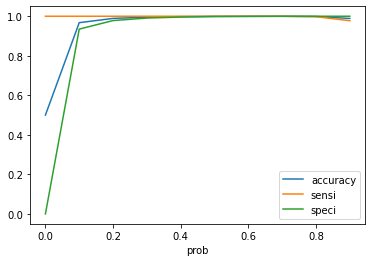

In [224]:
# Finding optimal cut-off probability
findOptimalCutoff(y_train_df)

Seems like 0.5 is only the optimal cut off for this model, so we will keep as it is

In [225]:
y_test_df= predictChurnWithProb(xgb2,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.7797004807498081
Sensitivity/Recall : 0.6173333333333333
Specificity: 0.9420676281662829
False Positive Rate: 0.057932371833717126
Positive predictive value: 0.4920297555791711
Negative Predictive value: 0.9643920595533498
sklearn precision score value: 0.4920297555791711


,churn,churn_Prob,final_predicted
20296,1,0.042662,0
8279,1,0.063601,0
72269,0,0.016417,0
65602,0,0.003556,0
42758,1,0.640217,1


**As per the observations here, it looks like XGBoost classifier is over-fitting the model with very high train score but low test score**

Train Recall : 100% and Train Roc_auc_score : 99.99

Test Recall : 61.73% and Test Roc_auc_score : 77.97

### Final Choice of Model

Recall is the most important business metric for the telecom churn problem. The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. The cost to the company of churning is much higher than having a few false positives.

Overall, the **Logistic Regression** model using PCA with probability cut-off = 0.45, performs **best**. It achieved the best recall sensitivity of **88.1%** on train and **84.26%** for test data. Also the overall accuracy and specificity is consistent for Test and train data, thus avoiding overfitting.

From the Tree Family, the **Decision Tree** obtained **89%** recall accuracy on train data which is fairly good but have **74%** of test data recall accuracy.

Among the Boosting Methods, XGBoost Classifier totally overfitted the data by achieving recall accuracy of **100%** for train data but only **61%** for test data, so we dont consider this model as the best model.

### Identifying relevant churn features

As we have performed Logistic Regression with RFE, during that process we found out features which are top predictors and not correlated amongst each other: 

**total_rech_num_8:** Total number of recharge done in month 8

**avg_total_rech_num_av67:** Average recharge done in month 6 and 7	

**avg_monthly_2g_av67	:** Average monthly 2G usage in month 6 and 7

**monthly_2g_8:** Monthly 2G usage in month 8

**total_rech_data_8:** Total recharge data in month 8

**avg_sachet_3g_av67:** Average 3G sachet data in month 6 and 7	

**loc_ic_t2t_mou_8:** Local incoming calls from same operator minutes of usage in month 8

**loc_ic_t2f_mou_8:** Local incoming calls from same operator to fixed lines minutes of usage in month 8

**monthly_3g_8:** Monthly 3G usage in month 8	

**spl_ic_mou_8:** Special Incoming calls in month 8	

**std_og_t2f_mou_8:** Standard calls operator to fixed lines in month 8

It is clear that what happens in the action phase has a direct impact on the customer churn of high value customers

### Business Recommendations

- It is a fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

- For many incumbent operators, retaining high profitable customers is the number one business goal.

*Customer churn seems to be well predicted by drop in usage.*

- The telecom company should pay close attention to drop in MoU, ARPU and data usage (2g and 3g) month over month. If feasible, the company should track these numbers week over week. Since billing cycles are typically monthly, a drop in usage numbers will give the company time to react when tracked at weekly level.

- Contact these customers proactively to find out what's affecting their experience. Perhaps, offer them coupons or other incentives to continue to use the services, while the company fixes the issues reported.

- Marketing team must come up with campaigns which targets these high-value to-be churner.

- Improve Outgoing Services
- The Network operators must futher investigate their outgoing tariffs, plans and campaigns.
- Improve Roaming Services
- The Network operators must futher investigate their roaming tariffs, and quality of service.
- New campaigns which targets the roaming customers and high outage usage customers can be rolled out.
- Discounted outgoing rates during particular hours of the day for these customers.